# M8 Assignment : Diamonds EDA

### Team Members:
- Avinash Rajaraman Swaminathan
- Ankit Kumar Aggarwal
- Sayed Raheel Hussain

### Importing Necessary libraries and reading source file from Git.

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the csv using pandas, excluding the index column
diamond = pd.read_csv("https://raw.githubusercontent.com/sayedRaheel/AIM-5001/main/diamonds.csv", index_col=0)


#### From the dataset, we have found that the first column is the Index for the dataset. Hence, we have made it as index.

# 1. Data Summary:

In [3]:
#Getting # of Rows and Columns
diamond.shape
print(f'The dataset has {diamond.shape[0]} rows and {diamond.shape[1]} columns')

The dataset has 53940 rows and 10 columns


In [4]:
#total data
diamond.size
print(f'The total number of elemets in the dataset : {diamond.size}')

The total number of elemets in the dataset : 539400


In [5]:
#inspecting the data
#sanity check
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


## Observations:

- 1. All the attributes seems to be in right format of data type 

- 2. The given dataset consists of 10 columns and 53940 rows of data.

- 3. The total number of elements in the datasets are 539400.

- 4. There are 3 categorical and and 8 numerical attributes in the dataset.

##### Categorical variables: 

Cut, Color and Clarity are categorical variables because they take a limited number of discrete values that represent different categories or levels. cut and clarity have ordinal values, meaning that they have a specific order or ranking, while color has nominal values, meaning that there is no inherent order to the categories.

##### Numerical variables: 

Carat, Depth, Table, Price, X, Y, and Z are numerical variables because they represent numerical values that can be measured and quantified. carat, depth, table, and the dimensions x, y, and z are continuous variables, meaning that they can take on any value within a range. price is a discrete variable, as it can only take on certain values within a finite range.

In [7]:
## Extracting Numerical and Categorical Variables from the dataset.
numeric_data = diamond.select_dtypes(include=[np.number])
categorical_data = diamond.select_dtypes(exclude=[np.number])

Numerical_columns=numeric_data.columns.to_list()
Categorical_columns=categorical_data.columns.to_list()

print("Numerical Attributes in the dataset are:",Numerical_columns)
print("Categorical Attributes in the dataset are:",Categorical_columns)

Numerical Attributes in the dataset are: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
Categorical Attributes in the dataset are: ['cut', 'color', 'clarity']


### List of Categorical Attributes in the Datasets: 
   - Cut (Ordinal)
   - Color (Ordinal) 
   - Clarity (Ordinal)

### List of Numerical Attributes in the Datasets: 
   - Carat
   - Depth 
   - Table
   - Price
   - x
   - y
   - z
    
    

## Use Case Summary
The diamond dataset is primarily used to examine the characteristics of diamonds and their prices. It can be used to gain insights into the relationships between different diamond attributes and their impact on prices, as well as to build predictive models for estimating diamond prices based on their attributes. 

This dataset can be used to:

- Understand the relationships between different diamond attributes and how they impact the price of a diamond.
- Build predictive models to estimate the price of a diamond based on different attributes.
- Analyze trends and patterns for diamonds based on different attributes.
- Compare different types of diamonds (e.g. based on cut, color, or clarity) and their prices.
- Identify outliers.
- This dataset is relevant for anyone who is interested in understanding more about the dimonds and the impact based on different attributes. 

# 2. Exploratory Data Analysis (EDA)



- Analyzing a data set for purposes of summarizing its characteristics, identifying relationships between its attributes, and discovering patterns, trends, outliers, missing values and invalid values within the data.


In [8]:
#Getting familair with data
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
#Columns present in data
diamond.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Summary Statistics

In [10]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Observations
- The carat column has a wide range of values, from 0.2 to 5.01 carats. This indicates that the dataset includes diamonds of various sizes, from small to very large.

- The depth and table columns have relatively small standard deviations compared to their means, suggesting that these attributes do not vary widely across diamonds in the dataset.

- The price column has a very large standard deviation compared to its mean, indicating that there is a lot of variability in diamond prices.

- The x, y, and z columns have minimum values of 0, which is not physically possible for a diamond's dimensions. This suggests that there may be missing or incorrect data in the dataset that needs to be cleaned or validated.

- The quartiles for each column provide information about the distribution of values within that column. For example, the price column has a large interquartile range (IQR) of 4374.25, indicating that the middle 50% of diamond prices in the dataset vary widely. Similarly, the carat column has an IQR of 0.64, indicating that the middle 50% of diamond carat sizes in the dataset are relatively narrow.


### Missing/Invalid Values check

In [11]:
#checking missing values
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
#checking missing values
diamond.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Observation

- There are no missing or null values in the dataset.

## 2.1 Univariate Analysis

## Numerical Attrubutes 

## Attrubute 1:  "carat"

### "carat" attribute Analysis 

- Carat is a unit of measurement used to express the weight of diamonds and other gemstones. One carat is equal to 200 milligrams or 0.007 ounces.

In [13]:
#Missing / Invalid Data Values
diamond.carat.isnull().sum()

0

### Observation: 
- There are no Null values in the data. 


In [14]:
#all unique values in "carat" atribute
diamond.carat.unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

### Summary Statistics

In [15]:
#getting the summary of statistics of diamond size in carat
round(diamond.carat.describe(),3)

count    53940.000
mean         0.798
std          0.474
min          0.200
25%          0.400
50%          0.700
75%          1.040
max          5.010
Name: carat, dtype: float64

In [16]:
#most common occurance of values in "carat" 
diamond.carat.value_counts()

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: carat, Length: 273, dtype: int64

### Observation: 
- Most common diamond carat size is between 0.30-0.35 carat.
- The mean for diamond size in carat is 0.798, the smallest size is 0.200 and the biggest size is 5.010.


### Appropriate Graphics

#### Histogram

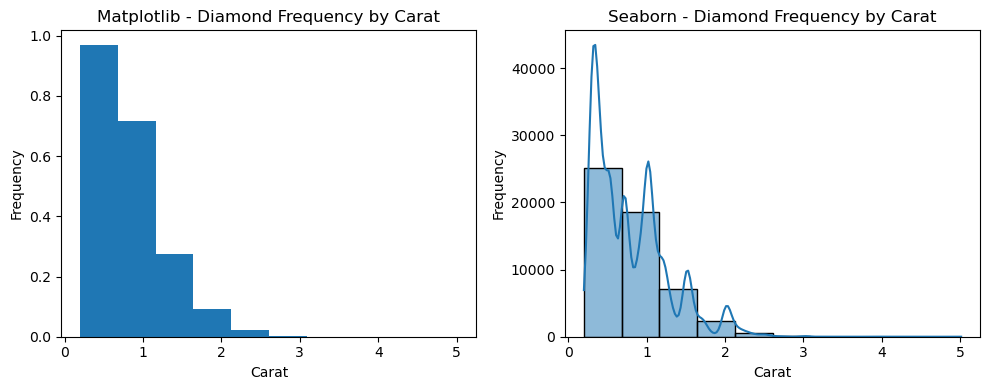

In [17]:
# Create a histogram using matplotlib and seaborm to show distribution of data in attribute "carat"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

# Matplotlib Histogram plot
diamond['carat'].plot(kind='hist', ax=axs[0], bins=10, density='True')
axs[0].set_title('Matplotlib - Diamond Frequency by Carat')
axs[0].set_xlabel('Carat')
axs[0].set_ylabel('Frequency')


# Seaborn Histogram plot with distribution
sns.histplot(x="carat", data=diamond, bins=10, kde='True')
axs[1].set_title('Seaborn - Diamond Frequency by Carat')
axs[1].set_xlabel('Carat')
axs[1].set_ylabel('Frequency')



plt.tight_layout()
plt.show()

### Observation: 
- we obserse the distribution of diamond size in data and it seems the distribution of data is right skewed, most of values/size of diamond occur between 0-2 carats and other values seems to be outliers

#### Boxplot

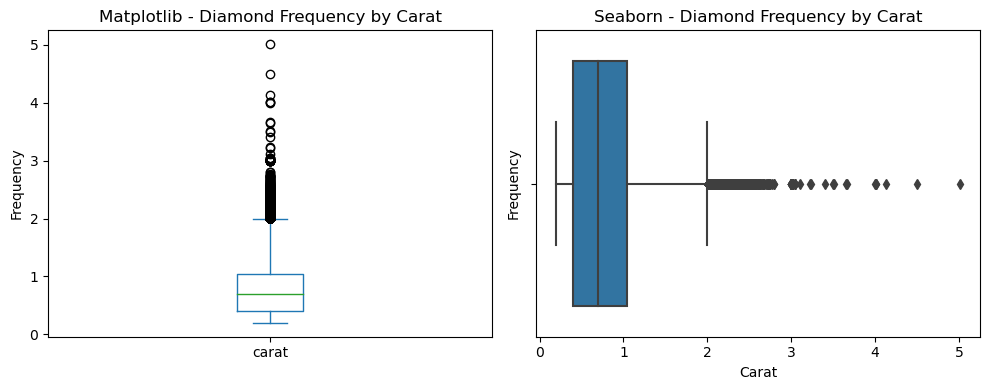

In [18]:
# Create boxplot using seaborn and seaborm to show distribution of data in attribute "depth" 

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))


# Matplotlib Histogram plot
diamond['carat'].plot(kind='box', ax=axs[0])
axs[0].set_title('Matplotlib - Diamond Frequency by Carat')
axs[0].set_ylabel('Frequency')


# Seaborn Histogram plot with distribution
sns.boxplot(x="carat", data=diamond)
axs[1].set_title('Seaborn - Diamond Frequency by Carat')
axs[1].set_xlabel('Carat')
axs[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [19]:
#observation of outliers using quantile
np.quantile(diamond['carat'], [0,0.25,0.5,0.75,0.9,0.95,0.99,1])

array([0.2 , 0.4 , 0.7 , 1.04, 1.51, 1.7 , 2.18, 5.01])

## Observation from "carat" attribute:
- we obserse the distribution of diamond size in data and it seems the distribution of data is right skewed, most of values/size of diamond occur between 0-2 carats and other values seems to be outliers 
- The mean for diamond size in carat is 0.798, the smallest size is 0.200 and the biggest size is 5.010
- The data has outliers above the upper quartile range
- Min value seems to be in between 0-0.5 and mean above 0.5 max value around 2 carat
- There is presence of outliers as observe from Boxplot and Histogram
- Outlier are present above 0.9 quartile as seen from graph and qualtile function values above 2 carat increses drastically

## Attrubute 1:  "depth"

### "depth" attribute Analysis
- Depth refers to the height of a diamond from the culet to the table, expressed as a percentage of the average girdle diameter. It is one of the measurements used to assess the overall quality of a diamond's cut.

- In general, a depth percentage that falls within a specific range is considered desirable for achieving maximum brilliance and fire in a diamond. However, the ideal depth percentage can vary depending on the other characteristics of the diamond, such as its shape and proportions.
- For round brilliant diamonds, the depth percentage is typically between 58% and 64%, with 61.5% being considered an ideal depth percentage

#### Clarity Grade:

- Excellent: Depth % = 59.0% - 61.0%, Table % = 53% - 60%
- Very Good: Depth % = 58.0% - 62.0%, Table % = 61% - 62%
- Good: Depth % = 56% - 64%, Table % = 62% - 64%
- Fair: Depth % = 64% - 70%, Table % = 64% - 66%
- Poor: Depth % > 70%, Table % > 66%

Note: Depth % = Depth + Diameter, Table % = Table + Diameter. The ranges given are for percentages within each grade based on Depth % and Table %.

Citation- https://www.torresjewelco.com.au/diamonds/education/depth-table-percentage.html

In [20]:
#Missing/Invalid values check
diamond.depth.isnull().sum()

0

### Observation: 
- There are no Null values in the data. 


In [21]:
#checking for unique values
diamond.depth.unique()

array([61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64. ,
       60.4, 62.2, 60.2, 60.9, 62. , 63.4, 63.8, 62.7, 61. , 58.1, 62.5,
       60.5, 60. , 60.7, 59.5, 58.2, 64.1, 60.8, 61.8, 61.2, 61.1, 65.2,
       58.4, 63.1, 61.6, 59.3, 62.6, 63. , 63.2, 62.1, 61.4, 62.9, 63.7,
       59.2, 59.9, 57.9, 55.1, 57.5, 66.3, 61.7, 58.8, 64.5, 65.3, 59.6,
       64.4, 65.7, 63.6, 61.3, 60.1, 60.3, 58. , 64.6, 59.7, 57.8, 67.9,
       60.6, 57.2, 64.2, 65.8, 67.4, 59. , 63.5, 67.3, 58.7, 66.4, 68.1,
       63.9, 55. , 58.6, 64.3, 58.5, 65. , 56. , 58.3, 53.1, 64.9, 59.1,
       58.9, 66.7, 57.7, 65.4, 53.3, 53. , 67.8, 66.1, 55.8, 67.6, 68.2,
       65.5, 67.7, 69.5, 56.6, 56.3, 66.9, 66. , 67. , 57.6, 67.1, 65.6,
       64.8, 69.3, 66.2, 55.4, 66.8, 64.7, 66.6, 55.9, 57.3, 57.4, 68.3,
       68.5, 56.2, 65.9, 56.5, 56.1, 66.5, 68.4, 69.7, 57.1, 68.7, 56.7,
       68.6, 71.6, 43. , 68.8, 67.5, 69. , 55.2, 68.9, 69.6, 57. , 56.4,
       56.8, 44. , 67.2, 70.1, 71.3, 70.6, 69.8, 71

### Summary Statistics

In [22]:
diamond.depth.describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

In [23]:
#most common occurance of values in "depth"
diamond.depth.value_counts()



62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
71.3       1
44.0       1
53.0       1
53.1       1
54.7       1
Name: depth, Length: 184, dtype: int64

In [24]:
#most common occurance of values in "depth" as percentage
diamond.depth.value_counts(normalize=True)*100

62.0    4.150908
61.9    4.010011
61.8    3.850575
62.2    3.780126
62.1    3.744902
          ...   
71.3    0.001854
44.0    0.001854
53.0    0.001854
53.1    0.001854
54.7    0.001854
Name: depth, Length: 184, dtype: float64

### Observation: 
- We observe from above venture that most common occuring values in dataset is around 60-65%, as from our understanding of data  is the Depth % = Depth + Diameter and depth od diamond in our data set lies around excellent to good depth.
- Also most common type of depth of diamond in our data set has Very Good and excellent depth.
- the mean is 61.74% that means most of the diamonds have excellent cut and very good depth.
- The minimum value is 43% and the maximum has 79%
- There also seems to be resence of Outliers in the data in "depth" attribute
-Citation- https://www.torresjewelco.com.au/diamonds/education/depth-table-percentage.html

### Appropriate Graphics

#### Histogram

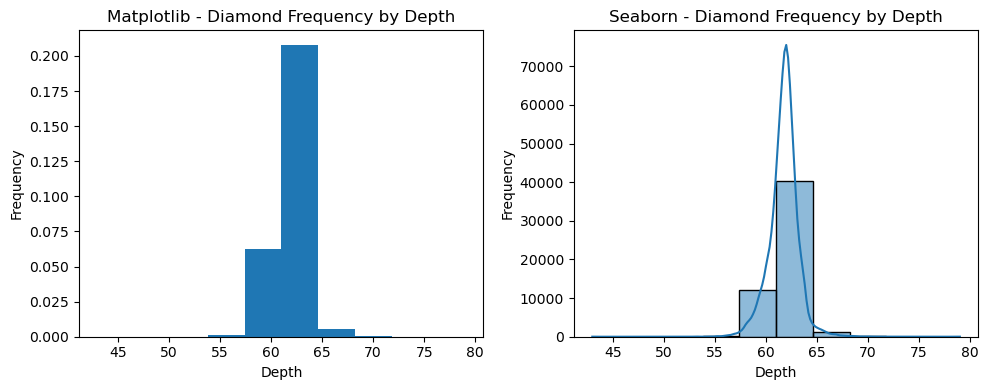

In [25]:
# Create a histogram using matplotlib and seaborm to show distribution of data in attribute "depth"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

# Matplotlib Histogram plot
diamond['depth'].plot(kind='hist', ax=axs[0], bins=10, density='True')
axs[0].set_title('Matplotlib - Diamond Frequency by Depth')
axs[0].set_xlabel('Depth')
axs[0].set_ylabel('Frequency')


# Seaborn Histogram plot with distribution
sns.histplot(x="depth", data=diamond, bins=10, kde='True')
axs[1].set_title('Seaborn - Diamond Frequency by Depth')
axs[1].set_xlabel('Depth')
axs[1].set_ylabel('Frequency')



plt.tight_layout()
plt.show()

### Observation: 
- Data seems to have a normal distribution and is not skewed also most of the values are around 60-65%
- Also mean of the data is 61.74 that means most of the diamonds have excellent cut in our dataset

#### Boxplot

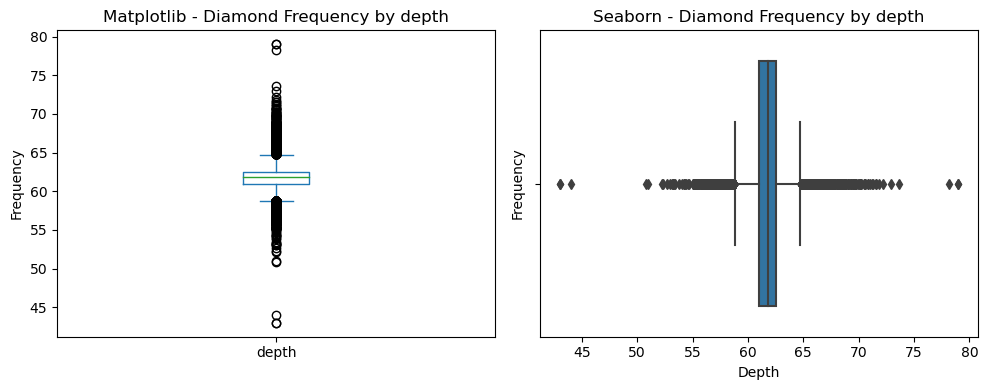

In [26]:
# Create boxplot using seaborn and seaborm to show distribution of data in attribute "depth"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))


# Matplotlib Histogram plot
diamond['depth'].plot(kind='box', ax=axs[0])
axs[0].set_title('Matplotlib - Diamond Frequency by depth')
axs[0].set_ylabel('Frequency')


# Seaborn Histogram plot with distribution
sns.boxplot(x="depth", data=diamond)
axs[1].set_title('Seaborn - Diamond Frequency by depth')
axs[1].set_xlabel('Depth')
axs[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [27]:
#statistical way to check for outliers
#observation of outliers using quantile
print(np.quantile(diamond['depth'], [0,0.25,0.5,0.75,0.9,0.95,0.99,1]))
#We can observe from quantile cut that values are reduced drastically after 0.25 quantile and 
#increased drctically above 0.99 quantile, These values are all outliers

[43.  61.  61.8 62.5 63.3 63.8 65.6 79. ]


In [28]:
diamond['depth'].median()

61.8

### Observation: 
- There are outliers in the data "depth" attribute both below and above inter quartile range
- Values as low as 43% are in data that are way below lower whisker
- Values as high as 79% are in data that are way higher than upper whisker
- Mean value of data is around 62%
- Median is 61
- We can observe from quantile cut that values are reduced drastically below 0.25 quantile and increased drastically above 0.99 quantile, These values are all outliers
 

## Attrubute 1:  "table"

- In the context of diamonds, the table refers to the flat surface on the top of the diamond. It is the largest facet of the diamond and plays a critical role in the reflection of light and the overall appearance of the diamond. The table percentage is the ratio of the width of the table facet to the diameter of the diamond, expressed as a percentage

#### Clarity Grade:

- Excellent: Depth % = 59.0% - 61.0%, Table % = 53% - 60%
- Very Good: Depth % = 58.0% - 62.0%, Table % = 61% - 62%
- Good: Depth % = 56% - 64%, Table % = 62% - 64%
- Fair: Depth % = 64% - 70%, Table % = 64% - 66%
- Poor: Depth % > 70%, Table % > 66%

Note: Depth % = Depth + Diameter, Table % = Table + Diameter. The ranges given are for percentages within each grade based on Depth % and Table %.

Citation- https://www.torresjewelco.com.au/diamonds/education/depth-table-percentage.html

In [29]:
#Missing values/Invalid Values check
diamond.table.isnull().sum()

0

### Observation: 
- There are no Null values in the data. 


In [30]:
#checking for unique values
diamond.table.unique()

array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

### Summary Statistics

In [31]:
#summary stats
diamond.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [32]:
#most common occurance of values in "depth"
diamond.table.value_counts()

56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
51.6       1
63.5       1
43.0       1
62.4       1
61.6       1
Name: table, Length: 127, dtype: int64

In [33]:
#most common occurance of values in "depth" as percentage
diamond.table.value_counts(normalize=True)*100

56.0    18.318502
57.0    18.027438
58.0    15.515387
59.0    12.183908
55.0    11.620319
          ...    
51.6     0.001854
63.5     0.001854
43.0     0.001854
62.4     0.001854
61.6     0.001854
Name: table, Length: 127, dtype: float64

### Observation:
- Most common and frequent values seems to be 56%-58%, that means the table(upper part of diamond) has excellent Cut.
- Our dataset consist of data that mostly has excellent table.
- The mean, common value is 57.45 % that comes under excellent cut
- The minimum values of table is 43% that comes below 25% of overall distribution of data.
- The maximum value is 95% that is poor cut
- Sumary statistics also gives idea that the data "table" attribute has outliers in it

## Appropriate Graphics

#### Histogram

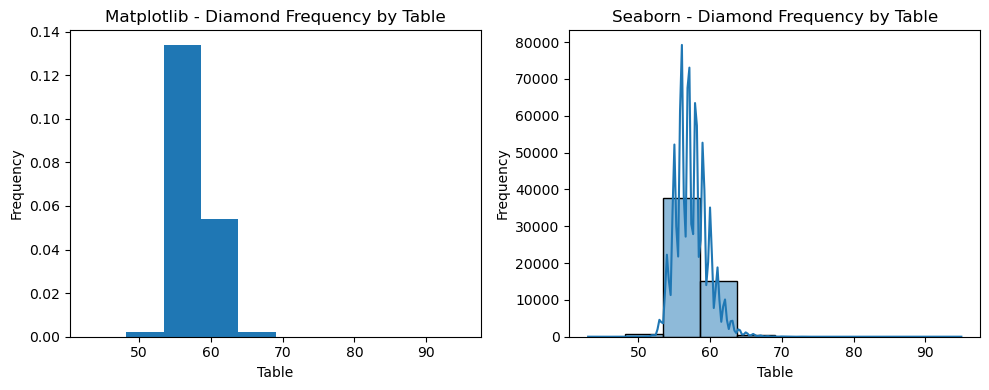

In [34]:
# Create a histogram using matplotlib and seaborm to show distribution of data in attribute "table"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

# Matplotlib Histogram plot
diamond['table'].plot(kind='hist', ax=axs[0], bins=10, density='True')
axs[0].set_title('Matplotlib - Diamond Frequency by Table')
axs[0].set_xlabel('Table')
axs[0].set_ylabel('Frequency')


# Seaborn Histogram plot with distribution
sns.histplot(x="table", data=diamond, bins=10, kde='True')
axs[1].set_title('Seaborn - Diamond Frequency by Table')
axs[1].set_xlabel('Table')
axs[1].set_ylabel('Frequency')



plt.tight_layout()
plt.show()

### Observation:
- Most of the data seems to be distributed around 55%-65%
- Follows a normal distribution even with presence of outliers on both sides that balance the data and not skewed
- Presence of outliers

    

#### Boxplot

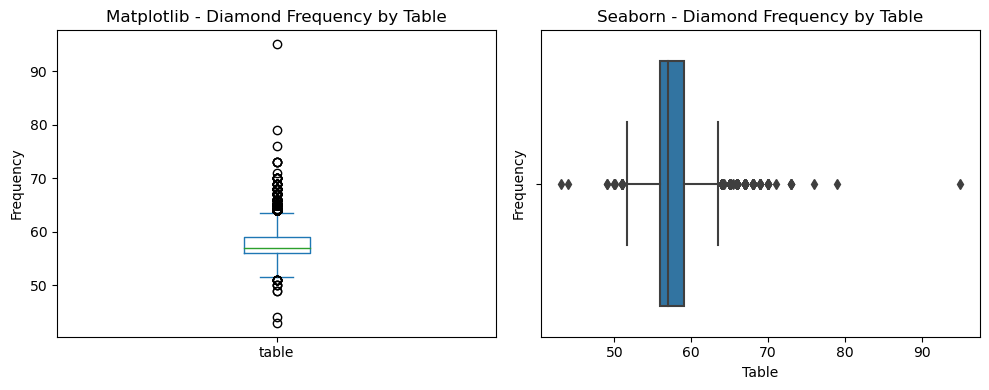

In [35]:
# Create boxplot using seaborn and seaborm to show distribution of data in attribute "Table"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))


# Matplotlib Histogram plot
diamond['table'].plot(kind='box', ax=axs[0])
axs[0].set_title('Matplotlib - Diamond Frequency by Table')
axs[0].set_ylabel('Frequency')


# Seaborn Histogram plot with distribution
sns.boxplot(x="table", data=diamond)
axs[1].set_title('Seaborn - Diamond Frequency by Table')
axs[1].set_xlabel('Table')
axs[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [36]:
#statistical way to check for outliers
#observation of outliers using quantile
print(np.quantile(diamond['table'], [0,0.25,0.5,0.75,0.9,0.95,0.99,1]))
#We can observe from quantile cut that values are reduced drastically after 0.25 quantile and 
#increased drctically above 0.99 quantile, These values are all outliers

[43. 56. 57. 59. 60. 61. 64. 95.]


In [37]:
diamond['table'].median()

57.0

### Observation:
- We can observe presence of outliers on both lower end and upper end
- Values as low as 43% are in data that are way below lower whisker
- Values as high as 95% are in data that are way higher than upper whisker
- Mean value of data is around 55%-60%%
- Median is 57%
- We can observe from quantile cut that values are reduced drastically below 0.25 quantile from 56% to 43% and increased drastically above 0.99 quantile from 64% to 95%, These values are all outliers


## Attrubute 1:  "price"
- In context of diamond "price" refers to actual cost of each diamond
- price in US dollars ( 326-18,823)

In [38]:
#Missing values/Invalid Values check
diamond.price.isnull().sum()

0

### Observation: 
- There are no Null values in the data. 


In [39]:
#checking unique values
#all unique values in "price" atribute
diamond.price.unique()

array([ 326,  327,  334, ..., 2753, 2755, 2756], dtype=int64)

### Summary Statistics

In [40]:
#getting the summary of statistics of diamond size in carat
diamond.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [41]:
#most common occurance of values in "price" 
diamond.price.value_counts()

605      132
802      127
625      126
828      125
776      124
        ... 
8816       1
14704      1
14699      1
14698      1
9793       1
Name: price, Length: 11602, dtype: int64

### Observation:
- Most of the values lie around 350$-1000$, most of diamond in dataset are around this cost.
- Minimum value is 326 and maximum value is 18823$
- There also seems to be hint of outliers in data

### Appropriate Graphics

#### Histogram

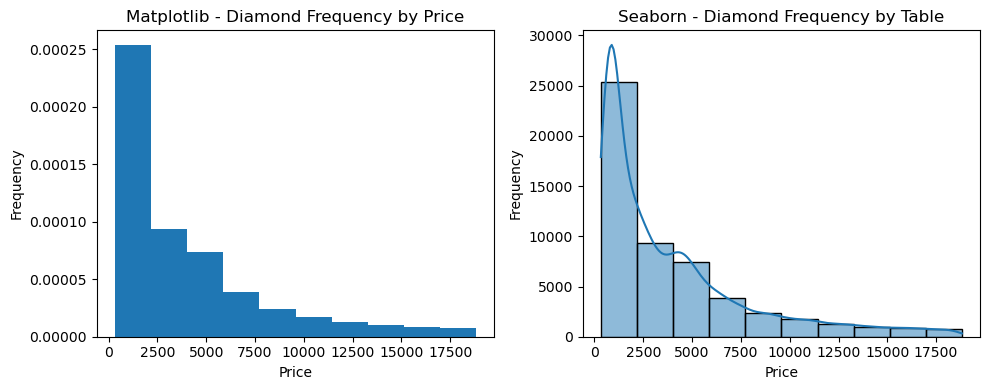

In [42]:
# Create a histogram using matplotlib and seaborm to show distribution of data in attribute "price"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

# Matplotlib Histogram plot
diamond['price'].plot(kind='hist', ax=axs[0], bins=10, density='True')
axs[0].set_title('Matplotlib - Diamond Frequency by Price')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')


# Seaborn Histogram plot with distribution
sns.histplot(x="price", data=diamond, bins=10, kde='True')
axs[1].set_title('Seaborn - Diamond Frequency by Table')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')



plt.tight_layout()
plt.show()

### Observation:
- The data "price" attribute seems to be right skewed distribution
- Most of the values seems to lie around 350- 1000 dollar
- Price goes as high as around 18000
- Mean of the data also around 3900 dollars
- Presence of outliers in upper range skwed the data

#### Boxplot

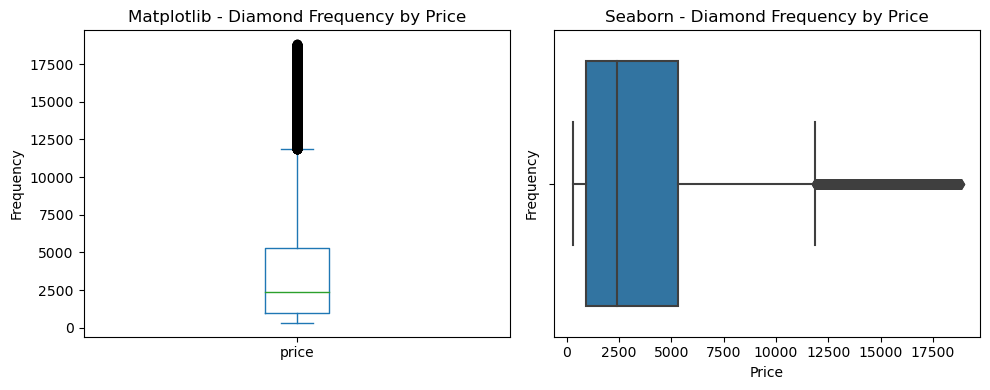

In [43]:
# Create boxplot using seaborn and seaborm to show distribution of data in attribute "price"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))


# Matplotlib Histogram plot
diamond['price'].plot(kind='box', ax=axs[0])
axs[0].set_title('Matplotlib - Diamond Frequency by Price')
axs[0].set_ylabel('Frequency')


# Seaborn Histogram plot with distribution
sns.boxplot(x="price", data=diamond)
axs[1].set_title('Seaborn - Diamond Frequency by Price')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [44]:
#statistical way to check for outliers
#observation of outliers using quantile
print(np.quantile(diamond['price'], [0,0.25,0.5,0.75,0.9,0.95,0.99,1]))
#We can observe from quantile cut that values are reduced drastically after 0.25 quantile and 
#increased drctically above 0.99 quantile, These values are all outliers

[  326.     950.    2401.    5324.25  9821.   13107.1  17378.22 18823.  ]


### Observation:
- Data in "price" attribute seems to have ouliers in upper range
- Values in upper range above upper whiskers increases drastically
- Median is around 2400 dollars
- Minimum values around 350 and max value or price of diamond in dataset is 18823 dollars
- After 0.95 quantile the values increases fast thats where the outliers are

## Attrubute 1:  "x"
- length in mm (0--10.74)

In [45]:
#Missing/Invalid values
diamond.x.isnull().sum()

0

### Observation: 
- There are no Null values in the data. 


In [46]:
#checking unique values
#all unique values in "x" atribute
diamond.x.unique()

array([ 3.95,  3.89,  4.05,  4.2 ,  4.34,  3.94,  4.07,  3.87,  4.  ,
        4.25,  3.93,  3.88,  4.35,  3.79,  4.38,  4.31,  4.23,  4.21,
        4.26,  3.85,  4.39,  4.44,  3.97,  4.28,  3.96,  4.04,  4.01,
        3.92,  4.06,  3.83,  4.29,  4.13,  4.49,  3.99,  4.19,  4.24,
        4.36,  4.33,  4.02,  4.45,  3.91,  4.3 ,  4.43,  4.54,  4.78,
        4.15,  4.08,  4.03,  4.65,  4.22,  5.7 ,  6.45,  5.68,  5.81,
        5.85,  5.71,  6.27,  5.77,  5.97,  5.8 ,  6.  ,  5.94,  5.87,
        5.9 ,  6.14,  5.38,  5.96,  6.16,  5.73,  5.98,  5.72,  6.01,
        5.64,  5.57,  5.63,  5.65,  6.09,  5.56,  6.11,  6.03,  5.89,
        5.69,  5.62,  5.88,  5.52,  5.74,  5.53,  5.78,  5.83,  5.66,
        5.82,  5.79,  5.92,  5.39,  5.33,  6.83,  5.41,  5.25,  5.24,
        5.67,  5.61,  5.76,  6.05,  5.6 ,  5.19,  5.84,  6.39,  5.34,
        5.14,  5.11,  5.54,  6.07,  6.29,  6.31,  6.49,  5.28,  5.48,
        5.55,  6.41,  6.02,  5.91,  6.17,  6.61,  5.12,  6.19,  5.43,
        5.99,  5.95,

### Summary Statistics

In [47]:
#summary stats
diamond.x.describe()

count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

In [48]:
#most common occurance of values in "x"
diamond.x.value_counts()

4.37     448
4.34     437
4.33     429
4.38     428
4.32     425
        ... 
10.74      1
9.36       1
8.89       1
10.23      1
10.00      1
Name: x, Length: 554, dtype: int64

In [49]:
#most common occurance of values in "x" length of diamond as percentage
diamond.x.value_counts(normalize=True)*100

4.37     0.830552
4.34     0.810159
4.33     0.795328
4.38     0.793474
4.32     0.787912
           ...   
10.74    0.001854
9.36     0.001854
8.89     0.001854
10.23    0.001854
10.00    0.001854
Name: x, Length: 554, dtype: float64

### Observation: 
- Mean lies at 5.7mm length, mean lenght of diamond in dataset
- The smallest length is very close to 0, might be an outlier
- The maximum lenght of diamond in dataset is 10.7mm
- Most of the values lies between 4- 6.5mm, most of the diamonds in dataset have 4-6.5mm length

### Appropriate Graphics

#### Histogram

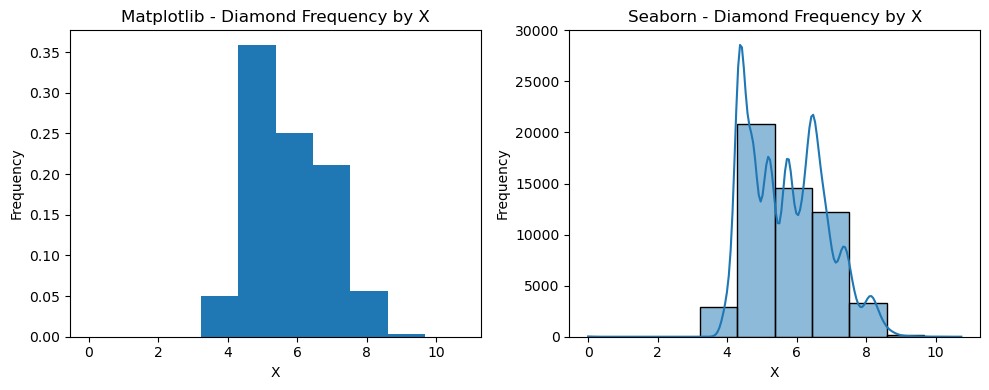

In [50]:
# Create a histogram using matplotlib and seaborm to show distribution of data in attribute "x"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

# Matplotlib Histogram plot
diamond['x'].plot(kind='hist', ax=axs[0], bins=10, density='True')
axs[0].set_title('Matplotlib - Diamond Frequency by X')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Frequency')


# Seaborn Histogram plot with distribution
sns.histplot(x="x", data=diamond, bins=10, kde='True')
axs[1].set_title('Seaborn - Diamond Frequency by X')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Frequency')



plt.tight_layout()
plt.show()


### Observation:
- The distribution of data is skewed right
- More values from dataset are between 4-7mm
- Presence of outliers

#### Boxplot

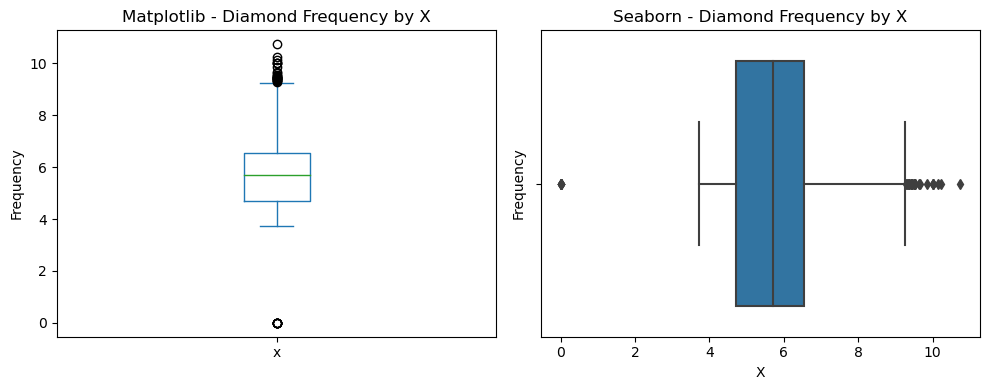

In [51]:
# Create boxplot using seaborn and seaborm to show distribution of data in attribute "x"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))


# Matplotlib Histogram plot
diamond['x'].plot(kind='box', ax=axs[0])
axs[0].set_title('Matplotlib - Diamond Frequency by X')
axs[0].set_ylabel('Frequency')


# Seaborn Histogram plot with distribution
sns.boxplot(x="x", data=diamond)
axs[1].set_title('Seaborn - Diamond Frequency by X')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [52]:
#statistical way to check for outliers
#observation of outliers using quantile
print(np.quantile(diamond['x'], [0,0.25,0.5,0.75,0.9,0.95,0.99,1]))
#We can observe from quantile cut that values are reduced drastically after 0.25 quantile and 
#increased drastically above 0.99 quantile, These values are all outliers

[ 0.    4.71  5.7   6.54  7.31  7.66  8.36 10.74]


### Observation:
- Presence of outliers on both higher and lower end
- Value as low as 0 present below lower whisker hence outlier
- Vlaue as high as 10.7 present above upper whisker
- From quantile its observed both upper and lower end has outliers.

## Attrubute 1:  "y"
-width in mm (0--58.9)

In [53]:
#Missing/Invalid values
diamond.y.isnull().sum()

0

### Observation: 
- There are no Null values in the data. 


In [54]:
#checking unique values
#all unique values in "y" atribute
diamond.y.unique()

array([ 3.98,  3.84,  4.07,  4.23,  4.35,  3.96,  4.11,  3.78,  4.05,
        4.28,  3.9 ,  4.37,  3.75,  4.42,  4.34,  4.29,  4.26,  4.27,
        4.3 ,  3.92,  4.43,  4.47,  4.01,  3.94,  3.97,  3.99,  4.03,
        4.06,  4.08,  3.85,  4.31,  4.16,  4.51,  4.5 ,  4.55,  4.02,
        4.24,  4.38,  3.95,  4.48,  3.89,  3.88,  4.33,  4.32,  4.59,
        4.84,  4.22,  4.  ,  4.25,  4.13,  4.09,  4.04,  4.12,  4.67,
        5.72,  6.33,  5.67,  5.73,  5.85,  5.9 ,  5.76,  5.95,  5.78,
        5.93,  5.75,  5.96,  5.79,  5.87,  5.8 ,  5.81,  6.11,  5.43,
        6.  ,  5.84,  6.12,  5.82,  5.74,  5.94,  6.07,  5.69,  5.83,
        5.61,  5.53,  5.58,  5.59,  5.97,  6.09,  5.99,  5.86,  5.68,
        5.65,  5.55,  5.77,  5.91,  5.56,  5.89,  5.92,  6.03,  5.44,
        5.37,  5.88,  6.9 ,  5.62,  5.27,  5.26,  5.7 ,  5.64,  5.63,
        5.71,  5.51,  5.22,  6.36,  5.54,  5.66,  6.2 ,  5.18,  5.15,
        6.1 ,  6.21,  6.22,  6.45,  6.01,  5.3 ,  5.41,  5.52,  6.27,
        6.05,  6.06,

### Summary Statistics

In [55]:
#summary stats
diamond.y.describe()

count    53940.000000
mean         5.734526
std          1.142135
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

In [56]:
#most common occurance of values in "y"
diamond.y.value_counts()

4.34     437
4.37     435
4.35     425
4.33     421
4.32     414
        ... 
8.89       1
10.16      1
9.46       1
9.63       1
31.80      1
Name: y, Length: 552, dtype: int64

In [57]:
#most common occurance of values in "y" width of diamond as percentage
diamond.y.value_counts(normalize=True)*100

4.34     0.810159
4.37     0.806452
4.35     0.787912
4.33     0.780497
4.32     0.767519
           ...   
8.89     0.001854
10.16    0.001854
9.46     0.001854
9.63     0.001854
31.80    0.001854
Name: y, Length: 552, dtype: float64

### Observation:
- No missing values in the 'y' column.
- The most common occurrence of values in 'y' is around 4.32 to 4.37, which represents the width of the diamond in millimeters.
- The percentage of occurrence of these common values is very low, ranging from 0.001854% to 0.810159%.
- The minimum value in 'y' is 0.0, which seems to be an invalid value.
- The maximum value of y is 58.9 which is very large and highly unlikely to be a valid measurement for the width of a diamond.
- The mean value of 'y' is 5.734526 and the standard deviation is 1.142135.
- The 25th percentile of 'y' is 4.72, the 50th percentile is 5.71, and the 75th percentile is 6.54.

#### Appropriate Graphs

#### Histogram

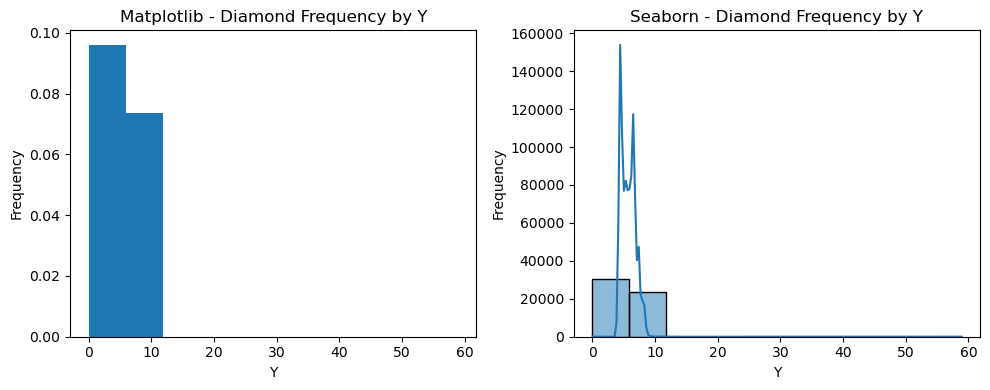

In [58]:
# Create a histogram using matplotlib and seaborm to show distribution of data in attribute "y"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

# Matplotlib Histogram plot
diamond['y'].plot(kind='hist', ax=axs[0], bins=10, density='True')
axs[0].set_title('Matplotlib - Diamond Frequency by Y')
axs[0].set_xlabel('Y')
axs[0].set_ylabel('Frequency')


# Seaborn Histogram plot with distribution
sns.histplot(x="y", data=diamond, bins=10, kde='True')
axs[1].set_title('Seaborn - Diamond Frequency by Y')
axs[1].set_xlabel('Y')
axs[1].set_ylabel('Frequency')



plt.tight_layout()
plt.show()


### Observation:
- Most of values are around 0-6.5mm
- Data distribution is right skewed
- Presence of outliers

#### Boxplot

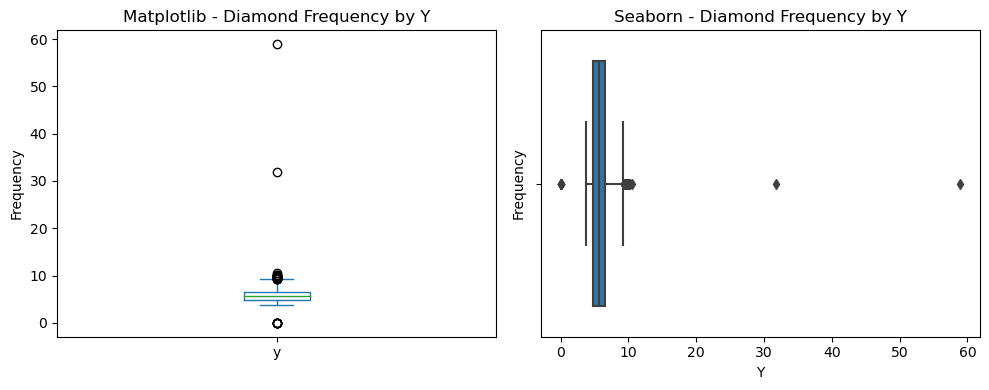

In [59]:
# Create boxplot using seaborn and seaborm to show distribution of data in attribute "y"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))


# Matplotlib Histogram plot
diamond['y'].plot(kind='box', ax=axs[0])
axs[0].set_title('Matplotlib - Diamond Frequency by Y')
axs[0].set_ylabel('Frequency')


# Seaborn Histogram plot with distribution
sns.boxplot(x="y", data=diamond)
axs[1].set_title('Seaborn - Diamond Frequency by Y')
axs[1].set_xlabel('Y')
axs[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [60]:
#statistical way to check for outliers
#observation of outliers using quantile
print(np.quantile(diamond['y'], [0,0.25,0.5,0.75,0.9,0.95,0.99,1]))
#We can observe from quantile cut that values are reduced drastically after 0.25 quantile and 
#increased drastically above 0.99 quantile, These values are all outliers

[ 0.    4.72  5.71  6.54  7.3   7.65  8.34 58.9 ]


In [61]:
diamond['y'].median()

5.71

### Observation:

- Median seems to be around 5.71
- From the output, it can be observed that the values for 'y' are drastically reduced after the 0.25th quantile and increased drastically above the 0.99th quantile. These values are considered as outliers.

## Attrubute 1:  "z"
-depth in mm (0--31.8)

In [62]:
#Missing/Invalid values
diamond.z.isnull().sum()

0

### Observation: 
- There are no Null values in the data. 


In [63]:
#checking unique values
#all unique values in "z" atribute
diamond.z.unique()

array([ 2.43,  2.31,  2.63,  2.75,  2.48,  2.47,  2.53,  2.49,  2.39,
        2.73,  2.46,  2.33,  2.71,  2.27,  2.68,  2.7 ,  2.66,  2.41,
        2.62,  2.59,  2.67,  2.4 ,  2.42,  2.44,  2.37,  2.52,  2.78,
        2.76,  2.61,  2.65,  2.79,  2.54,  2.64,  2.45,  2.72,  2.69,
        2.96,  2.58,  2.51,  2.56,  2.55,  2.87,  3.57,  3.52,  3.5 ,
        3.56,  3.72,  3.38,  3.4 ,  4.07,  3.66,  3.65,  3.58,  3.59,
        3.63,  3.69,  3.61,  3.6 ,  3.35,  3.67,  3.62,  3.87,  3.68,
        3.49,  3.47,  3.46,  3.7 ,  3.32,  3.93,  3.95,  3.64,  3.53,
        3.37,  3.43,  3.51,  3.54,  3.48,  3.55,  3.33,  3.3 ,  4.13,
        3.79,  3.24,  3.23,  4.08,  3.19,  3.94,  3.08,  3.31,  3.21,
        3.75,  3.18,  3.41,  4.03,  4.09,  3.22,  4.18,  3.76,  3.83,
        3.17,  3.44,  3.74,  3.8 ,  3.39,  3.88,  4.  ,  3.98,  3.85,
        3.96,  3.16,  3.78,  3.84,  4.33,  4.01,  3.45,  2.74,  2.95,
        2.8 ,  2.77,  2.9 ,  2.82,  3.77,  3.9 ,  3.73,  3.34,  3.86,
        3.89,  3.81,

### Summary Statistics

In [64]:
#summary stats
diamond.z.describe()

count    53940.000000
mean         3.538734
std          0.705699
min          0.000000
25%          2.910000
50%          3.530000
75%          4.040000
max         31.800000
Name: z, dtype: float64

In [65]:
#most common occurance of values in "z"
diamond.z.value_counts()

2.70     767
2.69     748
2.71     738
2.68     730
2.72     697
        ... 
5.79       1
5.72       1
5.91       1
5.61       1
31.80      1
Name: z, Length: 375, dtype: int64

In [66]:
#most common occurance of values in "z" depth of diamond as percentage
diamond.z.value_counts(normalize=True)*100

2.70     1.421950
2.69     1.386726
2.71     1.368187
2.68     1.353356
2.72     1.292176
           ...   
5.79     0.001854
5.72     0.001854
5.91     0.001854
5.61     0.001854
31.80    0.001854
Name: z, Length: 375, dtype: float64

### Observation:
- The most common occurrence of values in "z" is 2.70 with a count of 767, followed by 2.69 with a count of 748 and 2.71 with a count of 738.
- The summary statistics for "z" indicate that the mean value is 3.54, the standard deviation is 0.71, and the minimum and maximum values are 0 and 31.8, respectively. The 25th percentile is 2.91, the median (50th percentile) is 3.53, and the 75th percentile is 4.04.
- There seem to be some invalid values in the 'z' column of the diamond dataset. Specifically, the minimum value is 0, which is impossible as it would imply a 2-dimensional diamond. Additionally, the maximum value is 31.8, which is much larger than any reasonable value for the depth of a diamond.

##### Appropriate Graphs

#### Histogram

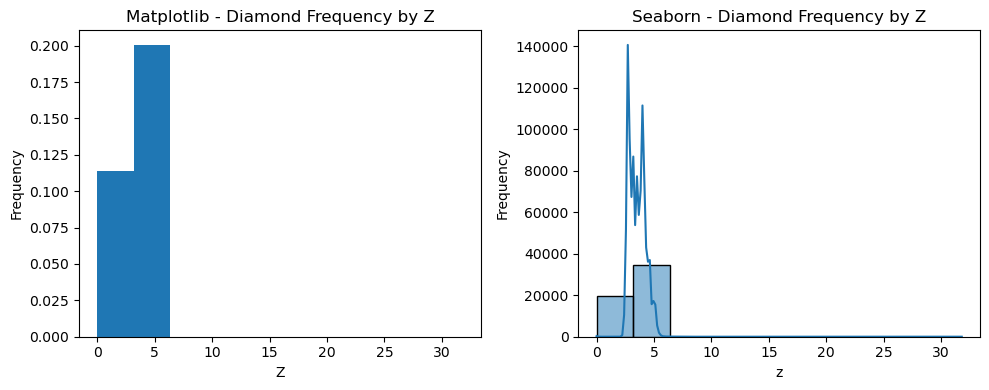

In [67]:
# Create a histogram using matplotlib and seaborm to show distribution of data in attribute "z"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

# Matplotlib Histogram plot
diamond['z'].plot(kind='hist', ax=axs[0], bins=10, density='True')
axs[0].set_title('Matplotlib - Diamond Frequency by Z')
axs[0].set_xlabel('Z')
axs[0].set_ylabel('Frequency')


# Seaborn Histogram plot with distribution
sns.histplot(x="z", data=diamond, bins=10, kde='True')
axs[1].set_title('Seaborn - Diamond Frequency by Z')
axs[1].set_xlabel('z')
axs[1].set_ylabel('Frequency')



plt.tight_layout()
plt.show()

### Observation:
- The minimum depth of a diamond is 0.0, which is not possible as it would mean the diamond has no height or has been flattened. This indicates the presence of invalid data in the dataset.
- The maximum depth of a diamond is 31.8, which is very high compared to the other values and may also indicate the presence of invalid data.

- The mean depth of a diamond is 3.538734.
- There are no missing values in the depth column.
- The distribution of the depth data is approximately normal, but with some outliers on the higher end of the scale.

#### Boxplot

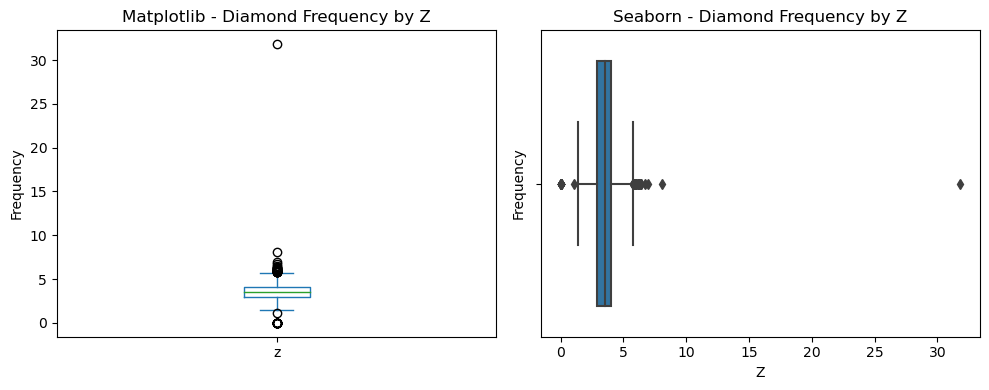

In [68]:
# Create boxplot using seaborn and seaborm to show distribution of data in attribute "z"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))


# Matplotlib Histogram plot
diamond['z'].plot(kind='box', ax=axs[0])
axs[0].set_title('Matplotlib - Diamond Frequency by Z')
axs[0].set_ylabel('Frequency')


# Seaborn Histogram plot with distribution
sns.boxplot(x="z", data=diamond)
axs[1].set_title('Seaborn - Diamond Frequency by Z')
axs[1].set_xlabel('Z')
axs[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()


In [69]:
#statistical way to check for outliers
#observation of outliers using quantile
print(np.quantile(diamond['z'], [0,0.25,0.5,0.75,0.9,0.95,0.99,1]))
#We can observe from quantile cut that values are reduced drastically after 0.25 quantile and 
#increased drastically above 0.99 quantile, These values are all outliers

[ 0.    2.91  3.53  4.04  4.52  4.73  5.15 31.8 ]


### Observation:
- Median seems to be around 3.53
- From the output, it can be observed that the values for 'z' are reduced below the 0.25th quantile that is 0 and increased drastically above the 0.99th quantile that is 31.8. These values are considered as outliers.

## Categorical Attrubutes 

## Attribute : "cut"

- Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

In [70]:
# Missing/Invalid value check
diamond.cut.isnull().sum()

0

### Observation: 
- There are no Null values in the data. 


In [71]:
#checking unique values
#all unique values in "z" atribute
diamond.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

### Summary Statistics

In [72]:
diamond.cut.describe()

count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object

In [73]:
# checking all the unique values and their occurence
diamond.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [74]:
# checking all the unique values and their percentage of occurence 
diamond.cut.value_counts(normalize=True)*100

Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: cut, dtype: float64

### Observation : 
- There are no missing values in the "cut" column.
- The "cut" column has 5 unique values: Ideal, Premium, Very Good, Good, and Fair.
- The most common cut category in the dataset is Ideal, with 21,551 diamonds falling into this category, followed by Premium and Very Good.
- The percentage of occurrence of each cut is: Ideal (39.95%), Premium (25.57%), Very Good (22.40%), Good (9.10%), and Fair (2.98%).
- There is a significant difference in the number of diamonds between the most common cut category (Ideal) and the least common (Fair).
- The distribution of diamonds among the cut categories may be an important factor to consider when analyzing the impact of cut on diamond prices or other attributes, as there are significant differences in the number of diamonds in each category.

#### Appropriate Graphics

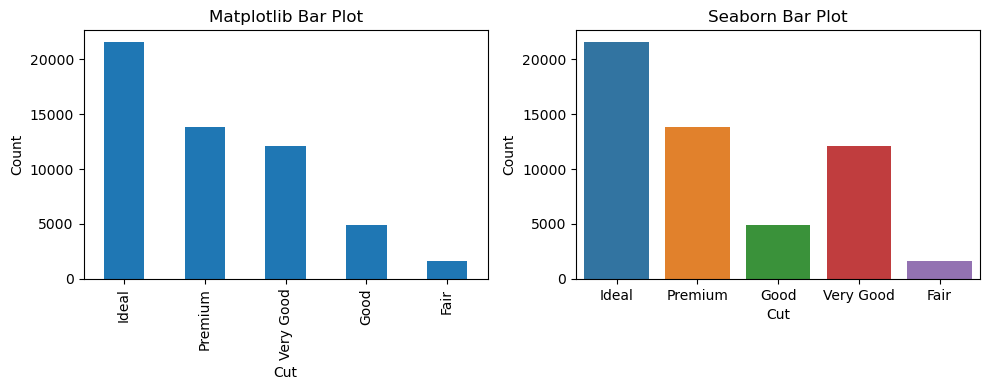

In [75]:
# Create a bar plot using matplotlib to show distribution of data in attribute "cut"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

# Matplotlib bar plot
diamond['cut'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Matplotlib Bar Plot')
axs[0].set_xlabel('Cut')
axs[0].set_ylabel('Count')

# Seaborn bar plot
sns.countplot(x='cut', data=diamond, ax=axs[1])
axs[1].set_title('Seaborn Bar Plot')
axs[1].set_xlabel('Cut')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### Observation:
- Most common types of cut are ideal and very good in dataset
- Least common cut in dataset is fair an good cut
- The distribution of diamonds across the different cut categories may reflect the preferences or trends in the diamond market. For example, the high number of Ideal and Premium cut diamonds might indicate that consumers are willing to pay more for diamonds with these cuts.
- The distribution of diamonds across the different cut categories might also be influenced by supply and demand factors.

## Attribute "color"

- diamond colour, from D (best) to J (worst)

In [76]:
 # Missing/Invalid value check
diamond.color.isnull().sum()

0

### Observation: 
- There are no Null values in the data. 


In [77]:
#checking unique values
#all unique values in "z" atribute
diamond.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

### Summary Statistics

In [78]:
#summary stats of dataset
diamond.color.describe()

count     53940
unique        7
top           G
freq      11292
Name: color, dtype: object

In [79]:
# checking all the unique values and their occurence
diamond.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [80]:
# checking all the unique values and their percentage of occurence 
diamond.color.value_counts(normalize=True)*100

G    20.934372
E    18.162773
F    17.690026
H    15.394883
D    12.560252
I    10.051910
J     5.205784
Name: color, dtype: float64

### Observation:
- There are no missing values in the "color" column.
- The most common color in the dataset is G, with 11,292 diamonds falling into this category, followed by color E, with 9,797 diamonds.
- The least common color in the dataset is J, with only 2,808 diamonds.
- There is a gradual decrease in the number of diamonds as the color grade moves from D to J.
- The percentage of diamonds in each color category varies, with G accounting for the largest proportion of diamonds (20.9%) and J accounting for the smallest proportion (5.2%).

#### Appropriate Graphics

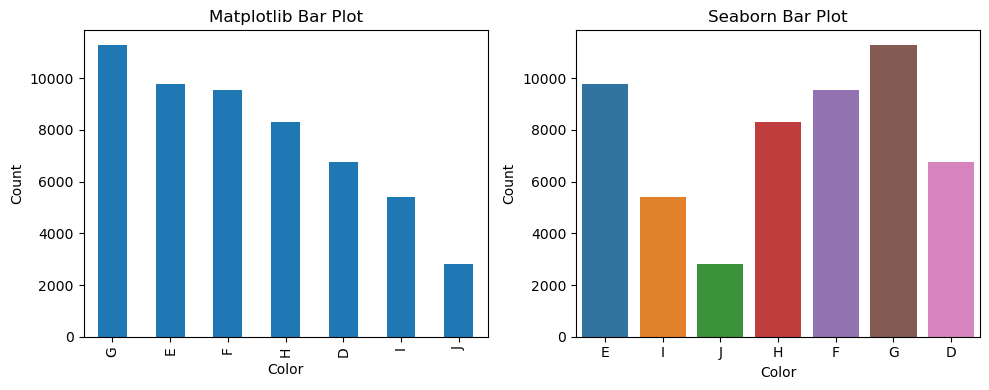

In [81]:
# Create a bar plot using matplotlib to show distribution of data in attribute "color"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

# Matplotlib bar plot
diamond['color'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Matplotlib Bar Plot')
axs[0].set_xlabel('Color')
axs[0].set_ylabel('Count')

# Seaborn bar plot
sns.countplot(x='color', data=diamond, ax=axs[1])
axs[1].set_title('Seaborn Bar Plot')
axs[1].set_xlabel('Color')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### Observation:
- Most common diamond color in the dataset is G, followed by E and F. The least common diamond color is J.
- The bar plots suggest that there are relatively few J colored diamonds in the dataset, which might reflect a lower demand for diamonds in this color category. This could be an important factor to consider when analyzing the value or price of J colored diamonds.

- The differences in the number of diamonds across the different color categories might also reflect differences in the quality or characteristics of diamonds in each category.

## Attribute "clarity"

- Clarity is a term used to describe the purity or transparency of a diamond or other gemstone. It refers to the presence or absence of internal and external flaws, called inclusions and blemishes, respectively, as well as the degree to which they are visible to the naked eye or under magnification.

In [82]:
 # Missing/Invalid value check
diamond.clarity.isnull().sum()

0

### Observation: 
- There are no Null values in the data. 


In [83]:
#checking unique values
#all unique values in "z" atribute
diamond.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

### Summary Statistics

In [84]:
#summary stats of dataset
diamond.clarity.describe()

count     53940
unique        8
top         SI1
freq      13065
Name: clarity, dtype: object

In [85]:
#most common occuring value
diamond.clarity.mode()

0    SI1
Name: clarity, dtype: object

In [86]:
# checking all the unique values and their occurence
clarity_count=diamond.clarity.value_counts()
clarity_count

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [87]:
# checking all the unique values and their percentage of occurence 
diamond.clarity.value_counts(normalize=True)*100

SI1     24.221357
VS2     22.725250
SI2     17.044865
VS1     15.148313
VVS2     9.391917
VVS1     6.776047
IF       3.318502
I1       1.373749
Name: clarity, dtype: float64

### Observation
- The clarity attribute has eight unique values, ranging from "I1" (worst) to "IF" (best).
- The most common clarity grades in the dataset are "SI1" (24.22%) and "VS2" (22.73%), followed by "SI2" (17.04%) and "VS1" (15.15%).
- The least common clarity grades are "IF" (3.32%) and "I1" (1.37%).
- The distribution of diamonds across different clarity grades is not uniform, with the top four clarity grades ("SI1", "VS2", "SI2", and "VS1") accounting for more than 79% of the dataset.

In [88]:
grades=clarity_count.index.tolist()
frequency=clarity_count.values.tolist()

#### Appropriate Graphics

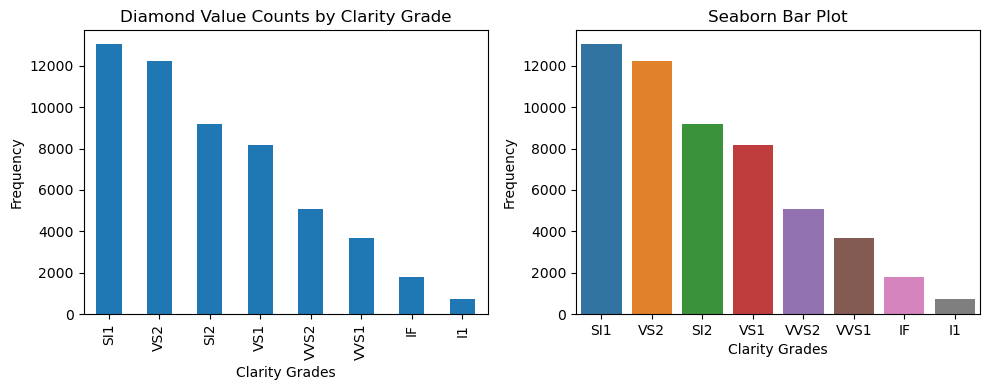

In [89]:
# Create a bar plot using matplotlib & Seaborn to show distribution of data in attribute "clarity"

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

# Matplotlib bar plot
diamond['clarity'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Diamond Value Counts by Clarity Grade')
axs[0].set_xlabel('Clarity Grades')
axs[0].set_ylabel('Frequency')


# Seaborn bar plot
sns.barplot(x=grades, y=frequency,orient='v')
axs[1].set_title('Seaborn Bar Plot')
axs[1].set_xlabel('Clarity Grades')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Observation : 
- Most common occuring value or most common diamond of clarity in dataset are SI1 (Slightly Included 1,VS2 (Very Slightly Included 2),SI2 (Slightly Included 2).
- These are the most common types of diamond in our dataset, least common diamonds are with clarity I1 (Included 1) ,IF (Internally Flawless). 
- Data mostly comprised of average type of clarity of diamonds
- Data does not seem to have outliers as it has almost no values that are infrequent
- Identifying outliers in categorical variables is often subjective and context-dependent. The least frequent values here are IF and I1 both make sense and are clarity grades of diamond.Hence There are no outliers
- The distribution of diamonds across different clarity grades might vary over time or across different markets.

## Step 2.2 Bivariate Analysis

### Step 2.2.1 Relationships Between Numerical Attributes (Numerical Vs Numerical

In [90]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [91]:
Categorical_columns

['cut', 'color', 'clarity']

In [92]:
Numerical_columns

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

### Correlation with Heatmap

In [93]:
corr=diamond[Numerical_columns].corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


## Observation:

- The above output is the covariance matrix for the numerical attributes in the Diamond dataset. The diagonal elements of the matrix represent the variance of each attribute, while the off-diagonal elements represent the covariance between pairs of attributes.

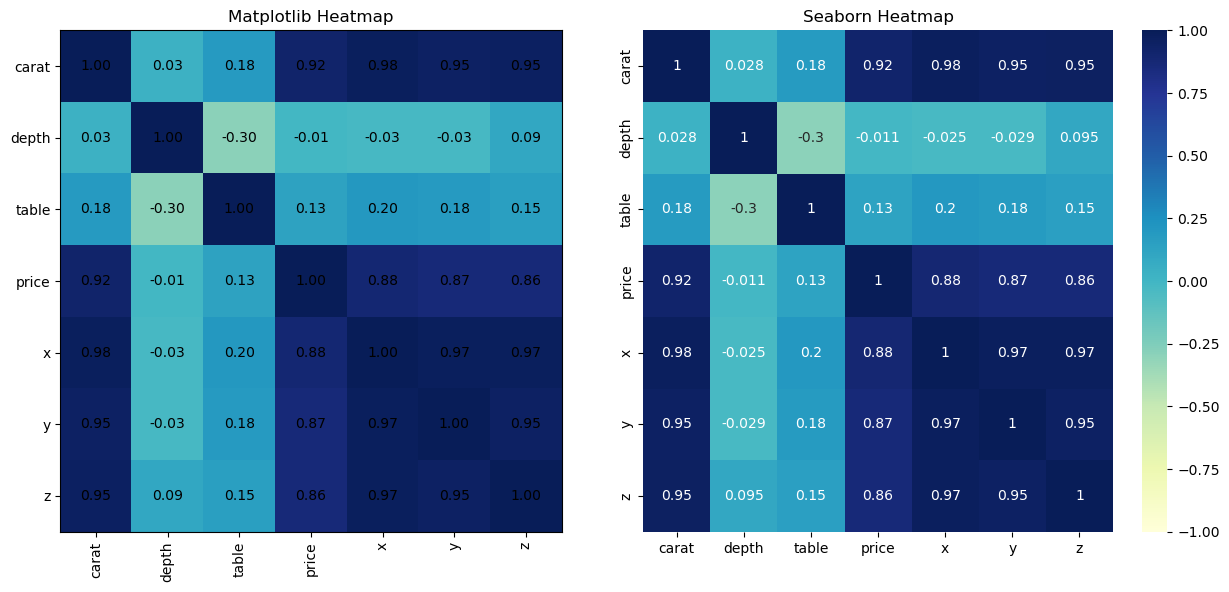

In [94]:
# Set up Matplotlib and Seaborn subplots
fig, axs = plt.subplots(ncols=2, figsize=(13, 6))

# Matplotlib heatmap
im = axs[0].imshow(corr, cmap='YlGnBu', vmin=-1, vmax=1)
axs[0].set_xticks(range(len(corr.columns)))
axs[0].set_yticks(range(len(corr.columns)))
axs[0].set_xticklabels(corr.columns, rotation=90)
axs[0].set_yticklabels(corr.columns)
axs[0].set_title('Matplotlib Heatmap')
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        axs[0].text(j, i, '{:.2f}'.format(corr.iloc[i, j]), ha='center', va='center', color='black')


# Seaborn heatmap
sns.heatmap(corr, cmap='YlGnBu', vmin=-1, vmax=1, annot=True, ax=axs[1])
axs[1].set_title('Seaborn Heatmap')

plt.tight_layout()
plt.show()

## Observation:

- The correlation between carat and price is very high (0.92), which indicates that there is a strong positive relationship between the two variables.
- The dimensions x, y, and z are highly correlated with each other, as well as with carat and price. This suggests that there is a strong relationship between the physical size of the diamond and its value.
- There is a weak negative correlation (-0.01) between depth and price, which suggests that as the depth of the diamond increases, its price tends to decrease slightly. However, this correlation is very weak and may not have much practical significance.

## Scatterplot

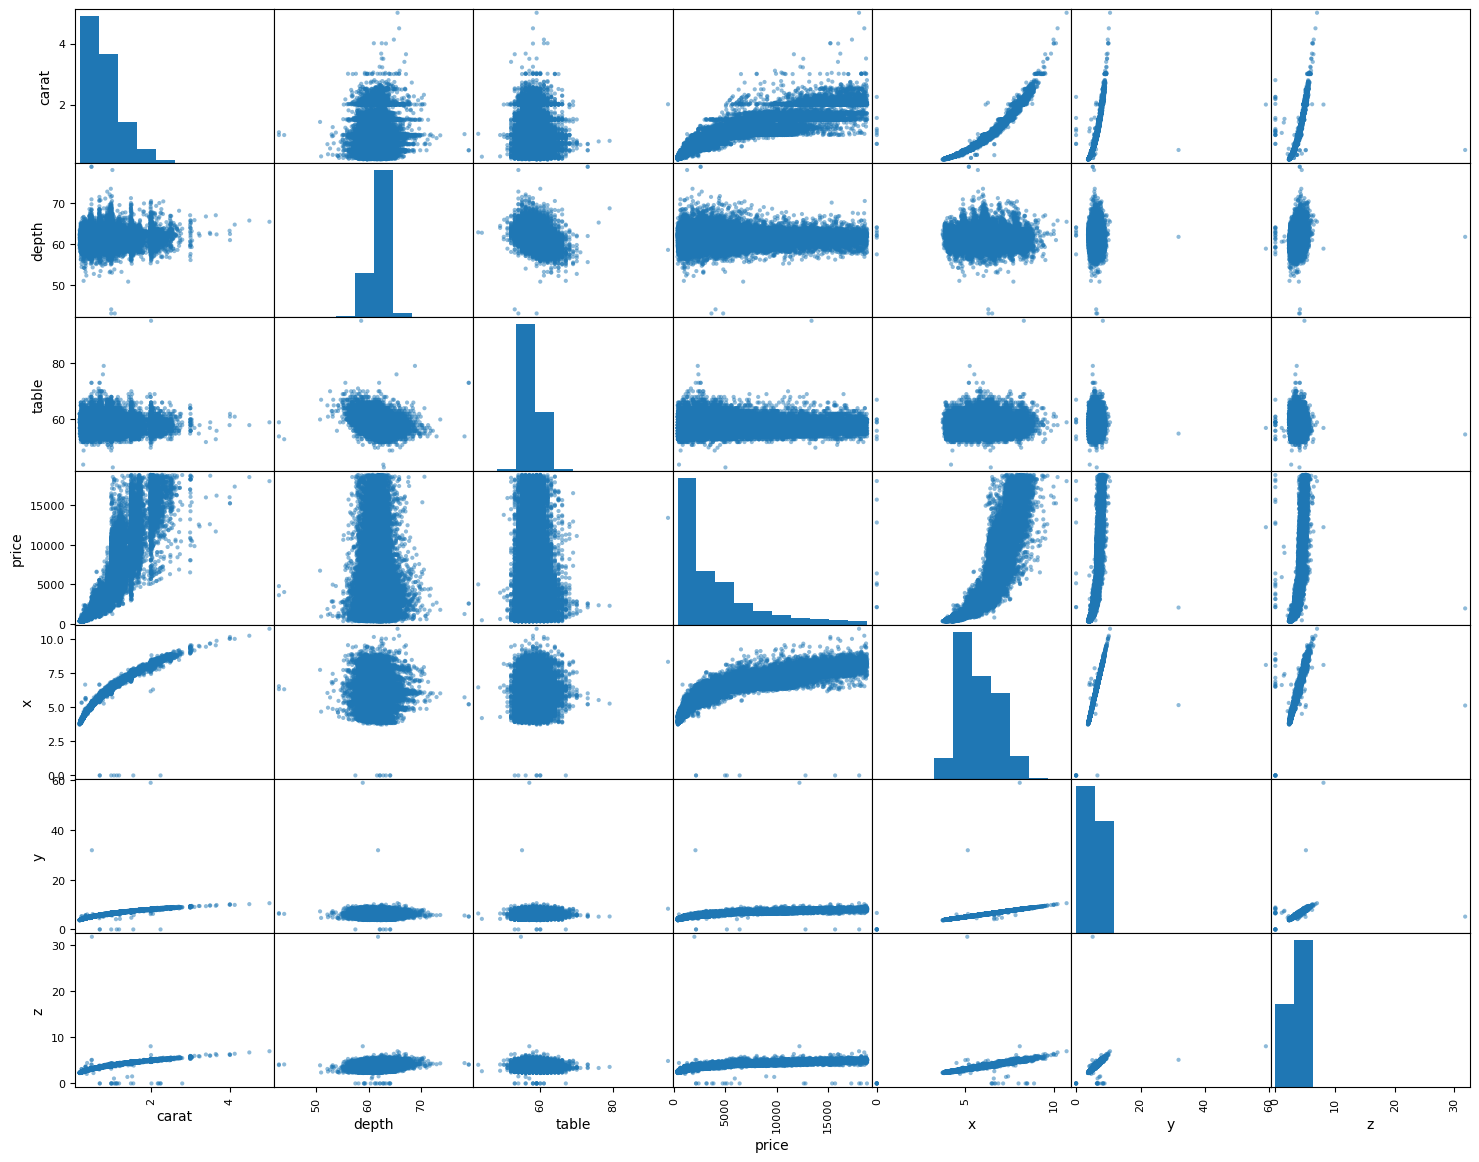

In [95]:
# Matplotlib

# create a scatter plot matrix
pd.plotting.scatter_matrix(diamond[Numerical_columns], figsize=(18, 14))
plt.show()

### Note: "Price" is a dependent variable in the dataset, We can start visualising numerical attribute "price" with other numerical attribute to observe how other numeric attribute affects the price of diamonds.

### Visualisation of "Price" attribute with "depth" (total depth percentage),"table" (width of top of diamond relative to widest point) and "carat" (weight of the diamond)

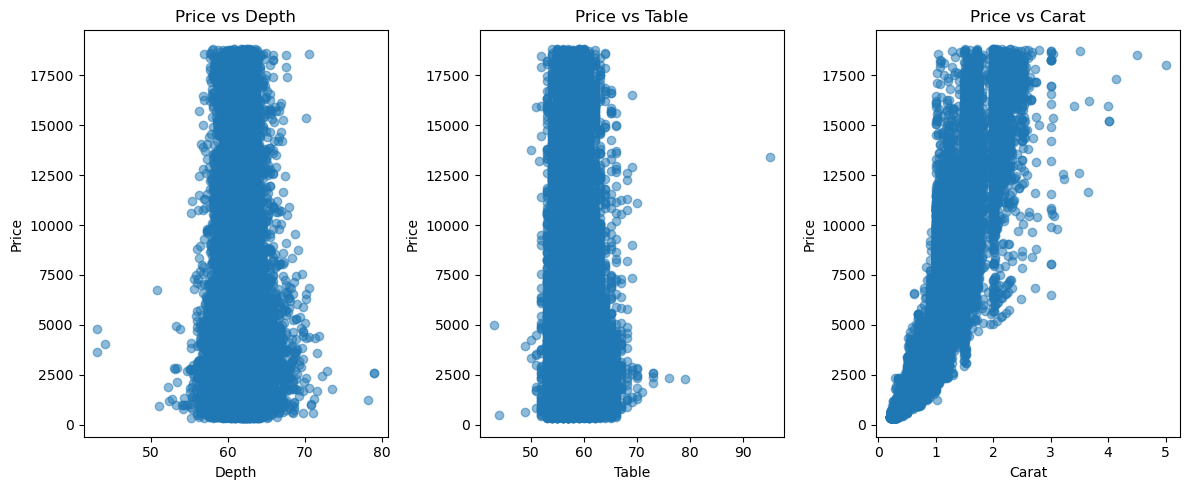

In [96]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))

axs[0].scatter(diamond['depth'], diamond['price'], alpha=0.5)
axs[0].set_xlabel('Depth')
axs[0].set_ylabel('Price')
axs[0].set_title('Price vs Depth')

axs[1].scatter(diamond['table'], diamond['price'], alpha=0.5)
axs[1].set_xlabel('Table')
axs[1].set_ylabel('Price')
axs[1].set_title('Price vs Table')

axs[2].scatter(diamond['carat'], diamond['price'], alpha=0.5)
axs[2].set_xlabel('Carat')
axs[2].set_ylabel('Price')
axs[2].set_title('Price vs Carat')

plt.tight_layout()
plt.show()

### Observation:
- As observed from the plot The $Price$ is independent of $depth%$, and both doesn't form any pattern.Hence the depth of diamond does not effecs its price
- We can also observer that The $Price$ is independent of $Table%$, and both doesn't form any pattern.Hence the width of top of diamond does not effect its price
- A different pattern is seen with $Carat$ vs $Price$, as the $Carat$ (size) of diamond increases the $Price$  increases drastically. But after a certain threshold increase in $Carat$ does not affects the $Price$ of diamond.
- The ideal $Carat$ weight that attracts the higher cost 0-3 

 Note: $Carat$ is just one of the attribute the affects the $Price$ of diamond, thats why for same $carat$ we have different $Price$

## Visualisation of "Price" attribute with "x"-length,"y"-width and "z"-depth attribute

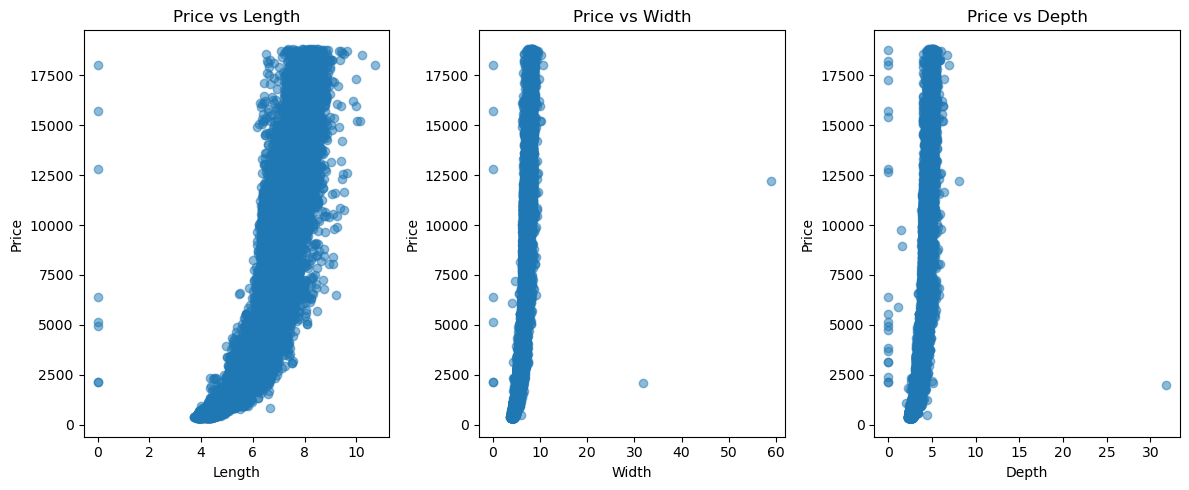

In [97]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))

axs[0].scatter(diamond['x'], diamond['price'], alpha=0.5)
axs[0].set_xlabel('Length')
axs[0].set_ylabel('Price')
axs[0].set_title('Price vs Length')

axs[1].scatter(diamond['y'], diamond['price'], alpha=0.5)
axs[1].set_xlabel('Width')
axs[1].set_ylabel('Price')
axs[1].set_title('Price vs Width')

axs[2].scatter(diamond['z'], diamond['price'], alpha=0.5)
axs[2].set_xlabel('Depth')
axs[2].set_ylabel('Price')
axs[2].set_title('Price vs Depth')

plt.tight_layout()
plt.show()

### Observation:
- As observed from the plot $Price$ vs $Length$, there seems to be linear sort of relation between both attribute.With increase in Length of diamond its price also increases. The increase in $Price$ between 4-10 mm and also after 6mm the $Price$ increases drastically.There is also a thrshhold after that further increase in $length$ of diamond does not affect the $Price$ of diamond.
- As observed from plot $Price$ vs $width$,there seems to be a pattern and with increase in $width$ of diamond the price increases drastically, but that only happens for a range between 0-10mm after that further increase in $Width$ doesn't affect the $Price$ of diamond.
- As observed from plot $Price$ vs $depth$,there seems to be a pattern and with increase in $depth$ of diamond the price increases drastically, but that only happens for a range between 2-5mm after that further increase in $depth$ doesn't affect the $Price$ of diamond.

Note: $Length$ and $width$ are just one of the attribute the affects the $Price$ of diamond, thats why for same $width$ and $Length$ we have different $Price$

## Pairplot

- In seaborn pairplot makes it easy to generate joint scatter plots for all the columns in the data.

### Visualisation of "x" (length),"y" (width),"z" (depth) ,table,carat with each other to observe any relationship

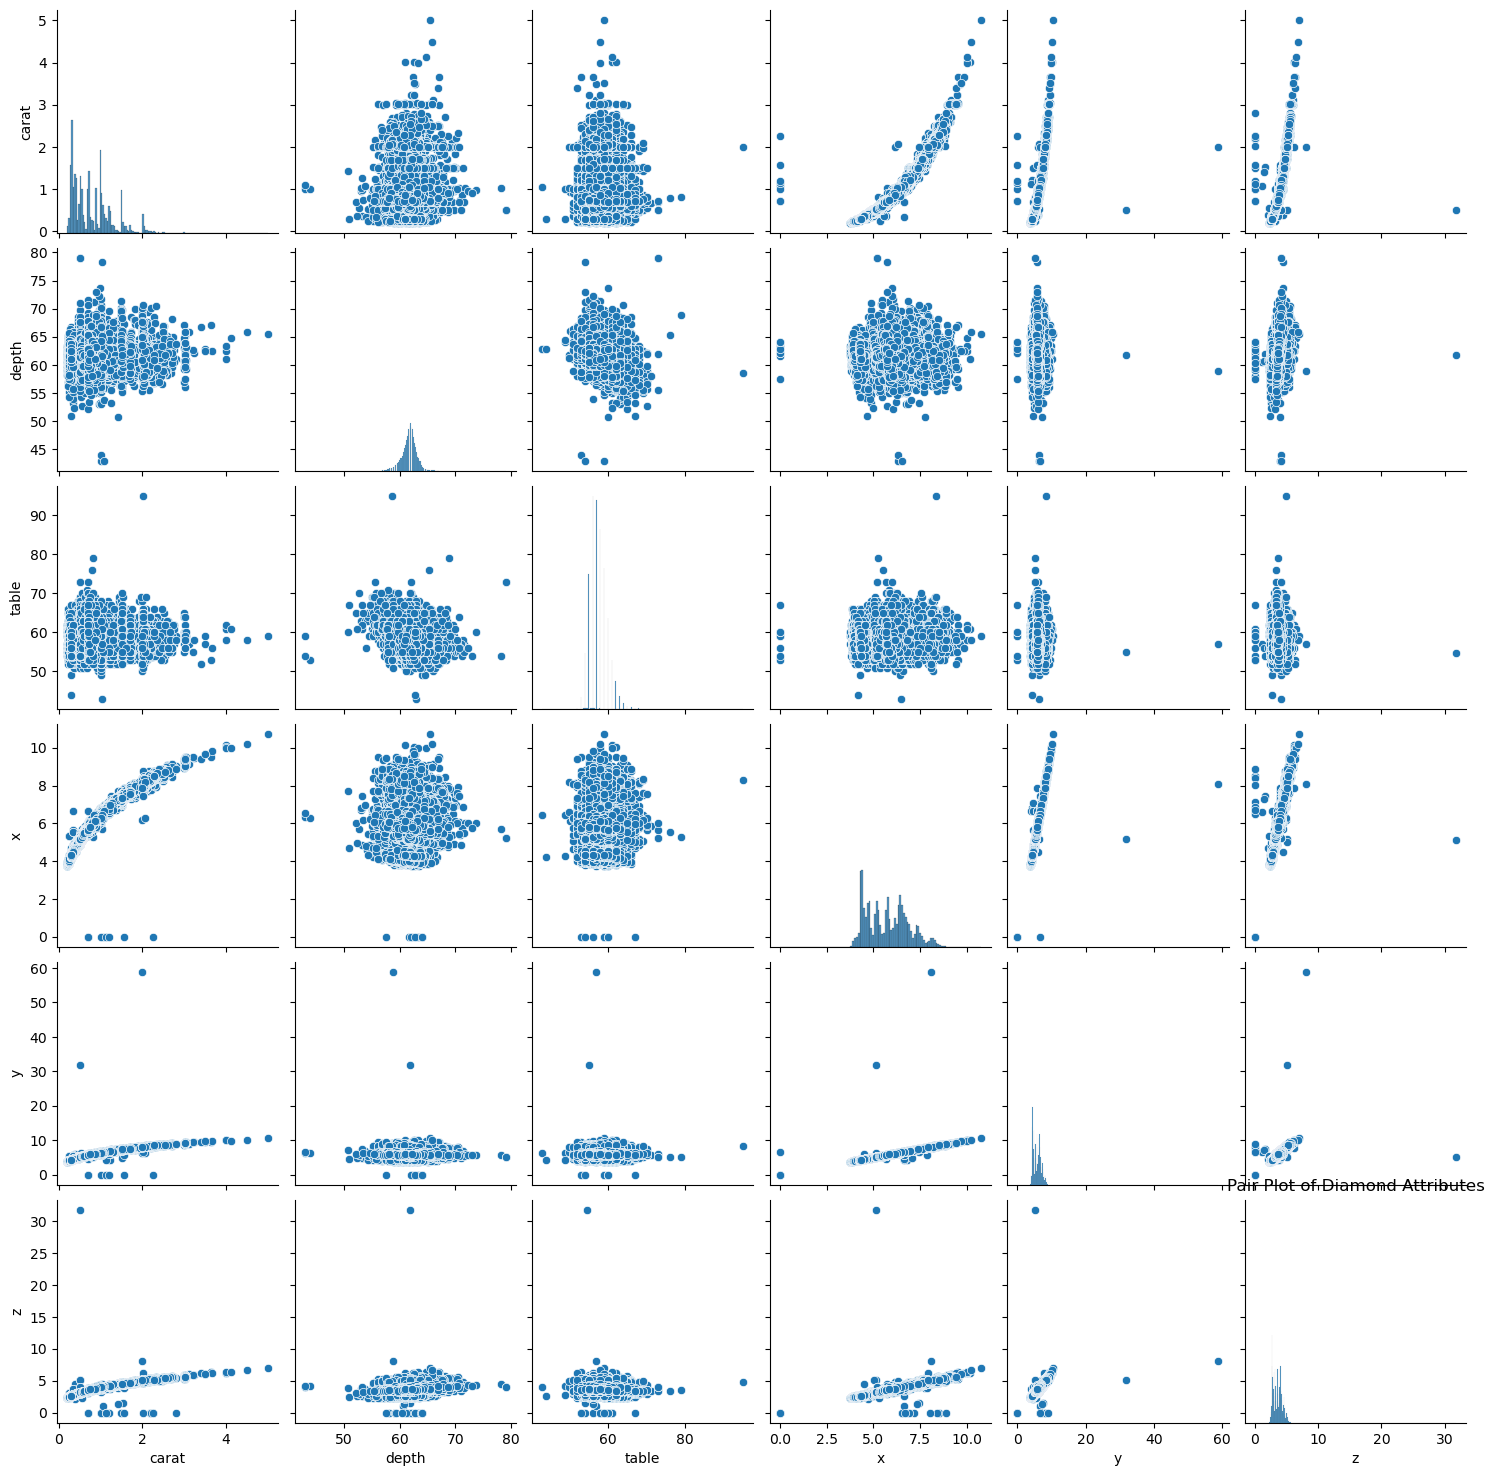

In [98]:
# Create a subset of the data with the variables of interest
subset = diamond[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Create a box plot using Seaborn
sns.pairplot(data=subset, palette='Set2')

# Set title and axis labels
plt.title('Pair Plot of Diamond Attributes')
plt.xlabel('Attribute Value')
plt.ylabel('Attribute Name')

# Display the plot
plt.show()

### Observation from Pairplot of numeric attribute:
- From the resulting plot, we can observe that the variables $carat$, $x$, $y$, and $z$ have a positively skewed distribution with a few outliers.

- The variables $depth$ and $table$ have a roughly normal distribution.

- We can also see some interesting relationships between the variables.For example, there appears to be a positive correlation between $carat$ and $x$, $y$, and $z$, which is to be expected since these variables all relate to the physical size of the diamond.

- The depth variable is relatively normally distributed, with a few outliers at both ends of the range.

- The $x$, $y$, and $z$ variables show a high concentration of values around 4, indicating that many diamonds are similar in size across these dimensions.

- There are some outliers in the $x$, $y$, and $z$ variables, indicating that there are some diamonds that are much larger in at least one dimension than the others.

## Step 2.2.2 Relationships Between Categorical Attributes (Categorical Vs Categorical)

### Crosstab and Stacked Bar plot

### Color Vs Cut

In [99]:
#Create a crosstab table for counts of each combination of 'cut' and 'color'

crosstab_color_cut=pd.crosstab(diamond['cut'],diamond['color'])
crosstab_color_cut

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


In [100]:
# Calculate percentage of each 'color' category in the total counts for each 'cut' category
color_cut_percentage=(crosstab_color_cut/diamond['color'].value_counts())*100
color_cut_percentage

,D,E,F,G,H,I,J
cut,,,,,,,
Fair,2.405904,2.286414,3.269755,2.780730,3.648844,3.227591,4.237892
Good,9.771218,9.523323,9.526305,7.713425,8.453757,9.627444,10.933048
Ideal,41.830258,39.838726,40.096416,43.251860,37.512042,38.601992,31.908832
Premium,23.660517,23.854241,24.428841,25.894439,28.420039,26.337145,28.774929
Very Good,22.332103,24.497295,22.678684,20.359547,21.965318,22.205828,24.145299


In [101]:
# Setting name for the columns in crosstab percentage
color_cut_percentage.columns.name = 'color'

AxesSubplot(0.125,0.11;0.775x0.77)


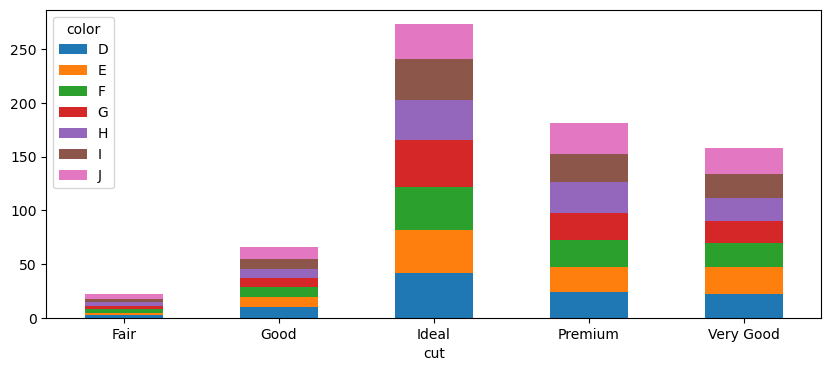

In [102]:
# Matplotlib

print(color_cut_percentage.plot(kind='bar',stacked=True,figsize=(10,4),rot=0))

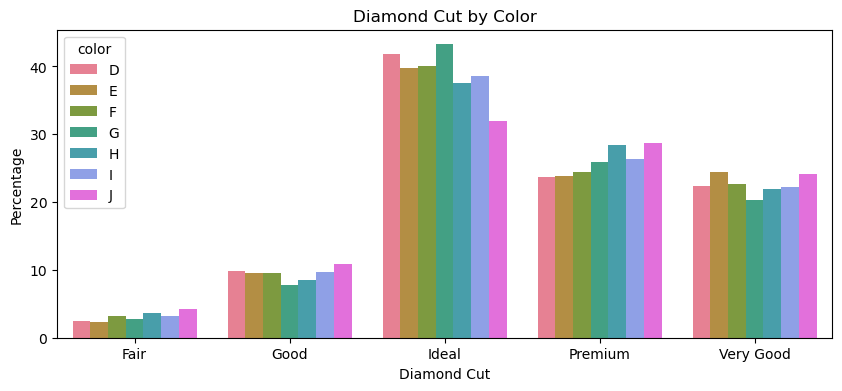

In [103]:
# Seaborn

# Reset the index and stack the data
stacked_data = color_cut_percentage.reset_index().melt(id_vars=['cut'], var_name='color', value_name='percentage')

# Set the palette and plot the stacked bar plot

plt.figure(figsize=(10, 4))
sns.barplot(x='cut', y='percentage', hue='color', data=stacked_data, palette='husl', estimator=sum)
plt.xlabel('Diamond Cut')
plt.ylabel('Percentage')
plt.title('Diamond Cut by Color')
plt.show()

## Observation:

- The distribution of diamond colors is fairly consistent across all cuts, with the exception of the "Fair" cut, which has a higher percentage of lower quality color diamonds (J and K). 

- The "Ideal" and "Premium" cuts have a relatively higher percentage of higher quality color diamonds (G, H, and I). Overall, the plot suggests that there is not a strong relationship between diamond cut and color.

	- We can see that the most common combination is Ideal and G, followed by Premium and G. The least common combination is Fair and J.

- We can also see that for each cut category, there is a varying distribution of color categories, with some colors being more common in certain cut categories than others


### Color Vs Clarity

In [104]:
#Create a crosstab table for counts of each combination of 'color' and 'clarity'

crosstab_color_clarity=pd.crosstab(diamond['clarity'],diamond['color'])
crosstab_color_clarity

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,42,102,143,150,162,92,50
IF,73,158,385,681,299,143,51
SI1,2083,2426,2131,1976,2275,1424,750
SI2,1370,1713,1609,1548,1563,912,479
VS1,705,1281,1364,2148,1169,962,542
VS2,1697,2470,2201,2347,1643,1169,731
VVS1,252,656,734,999,585,355,74
VVS2,553,991,975,1443,608,365,131


In [105]:
# Calculate percentage of each 'color' category in the total counts for each 'clarity' category
color_clarity_percentage=(crosstab_color_clarity/diamond['color'].value_counts())*100
color_clarity_percentage

,D,E,F,G,H,I,J
clarity,,,,,,,
I1,0.619926,1.041135,1.498638,1.328374,1.950867,1.696791,1.780627
IF,1.077491,1.612739,4.034794,6.030818,3.600674,2.637403,1.816239
SI1,30.745387,24.762682,22.332844,17.499114,27.396435,26.263371,26.709402
SI2,20.221402,17.484944,16.862293,13.708820,18.822254,16.820361,17.058405
VS1,10.405904,13.075431,14.294697,19.022317,14.077553,17.742530,19.301994
VS2,25.047970,25.211800,23.066443,20.784626,19.785645,21.560310,26.032764
VVS1,3.719557,6.695927,7.692308,8.846971,7.044798,6.547399,2.635328
VVS2,8.162362,10.115341,10.217984,12.778959,7.321773,6.731833,4.665242


In [106]:
# Setting name for the columns in crosstab percentage
color_clarity_percentage.columns.name = 'color'

AxesSubplot(0.125,0.11;0.775x0.77)


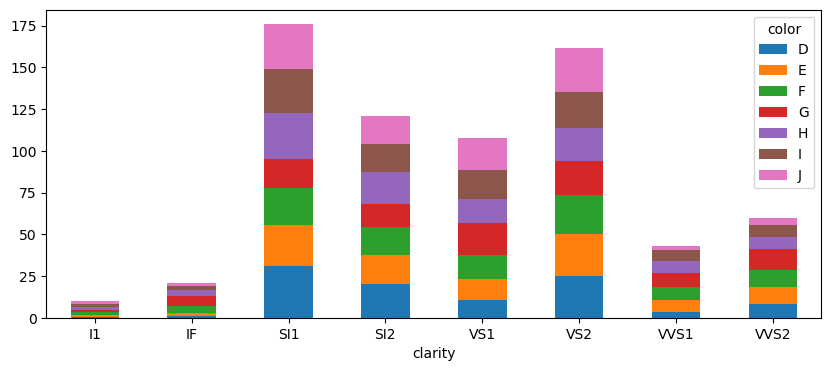

In [107]:
# Matplotlib

print(color_clarity_percentage.plot(kind='bar',stacked=True,figsize=(10,4),rot=0))

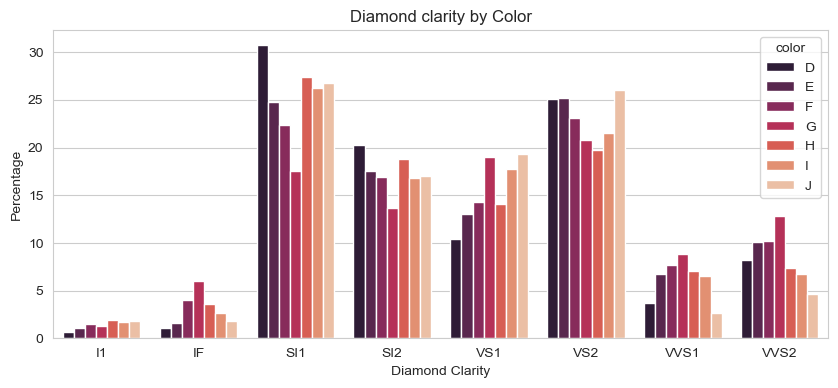

In [108]:
# Seaborn

# Reset the index and stack the data
stacked_data = color_clarity_percentage.reset_index().melt(id_vars=['clarity'], var_name='color', value_name='percentage')

# Set the palette and plot the stacked bar plot
sns.set_palette('husl')
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
sns.barplot(x='clarity', y='percentage', hue='color', data=stacked_data, palette='rocket', estimator=sum)
plt.xlabel('Diamond Clarity')
plt.ylabel('Percentage')
plt.title('Diamond clarity by Color')
plt.show()

### Observation:
- It can be observed that the most common clarity for diamonds across all colors is SI1, followed by VS2 and SI2. - Additionally, it appears that the proportion of diamonds with higher clarity grades (e.g. VVS1, VVS2, IF) is generally higher for diamonds with higher color grades (e.g. D, E, F).
- Conversely, diamonds with lower color grades (e.g. J, I, H) tend to have a higher proportion of lower clarity grades (e.g. I1, SI2).

### Catplot

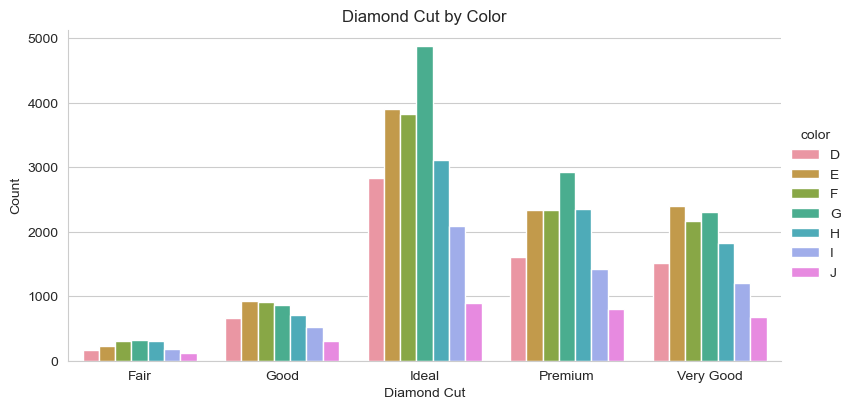

In [109]:
# Seaborn

# Create a crosstab table for counts of each combination of 'cut' and 'color'
crosstab_color_cut = pd.crosstab(diamond['cut'], diamond['color'])

# Reset the index of the crosstab table
crosstab_color_cut = crosstab_color_cut.reset_index()

# Reshape the crosstab table for a grouped bar chart
grouped_data = pd.melt(crosstab_color_cut, id_vars=['cut'], var_name='color', value_name='count')

# Create a grouped bar chart using Seaborn
sns.set_style("whitegrid")
sns.set_palette("husl")

sns.catplot(x="cut", y="count", hue="color", data=grouped_data, kind="bar", height=4, aspect=2)

plt.xlabel('Diamond Cut')
plt.ylabel('Count')
plt.title('Diamond Cut by Color')
plt.show()

### Observation:

- The majority of diamonds in the dataset are of a higher quality (higher cut grades), with the 'Ideal' cut being the most common. 
- In terms of color, the majority of diamonds are of lower quality (more yellow/brown), with 'G' being the most common.

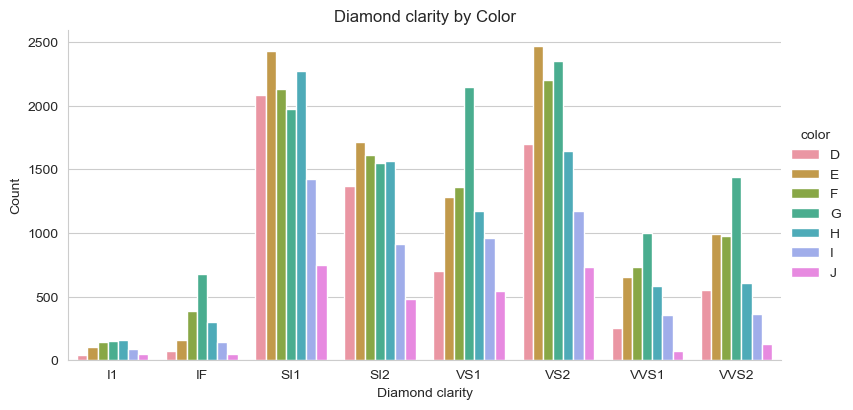

In [110]:
# Seaborn

# Create a crosstab table for counts of each combination of 'clarity' and 'color'
crosstab_color_cut = pd.crosstab(diamond['clarity'], diamond['color'])

# Reset the index of the crosstab table
crosstab_color_cut = crosstab_color_cut.reset_index()

# Reshape the crosstab table for a grouped bar chart
grouped_data = pd.melt(crosstab_color_cut, id_vars=['clarity'], var_name='color', value_name='count')

# Create a grouped bar chart using Seaborn
sns.set_style("whitegrid")
sns.set_palette("husl")

sns.catplot(x="clarity", y="count", hue="color", data=grouped_data, kind="bar", height=4, aspect=2)

plt.xlabel('Diamond clarity')
plt.ylabel('Count')
plt.title('Diamond clarity by Color')
plt.show()

### Observation:

- The distribution of diamond counts by color for different clarity grades. The majority of diamonds are of higher clarity grades, with 'SI1' being the most common. 
- VS2 and SI1 have the maximum average in terms of overall colors

### Note: Catplot is a pre-defined plot available in seaborn library, and not in matplotlib, and hence we have plotted with seaborn

## Step 2.2.3 Relationships Between Numerical/ Categorical Attributes

### Boxplots

### Price variation across cuts, color and clarity

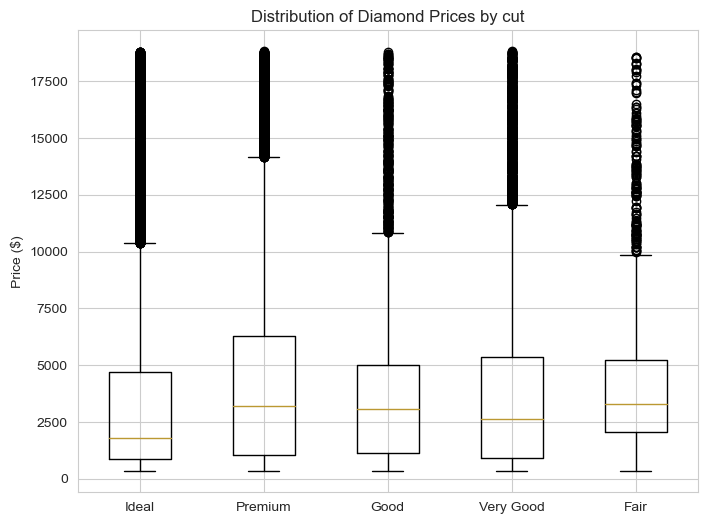

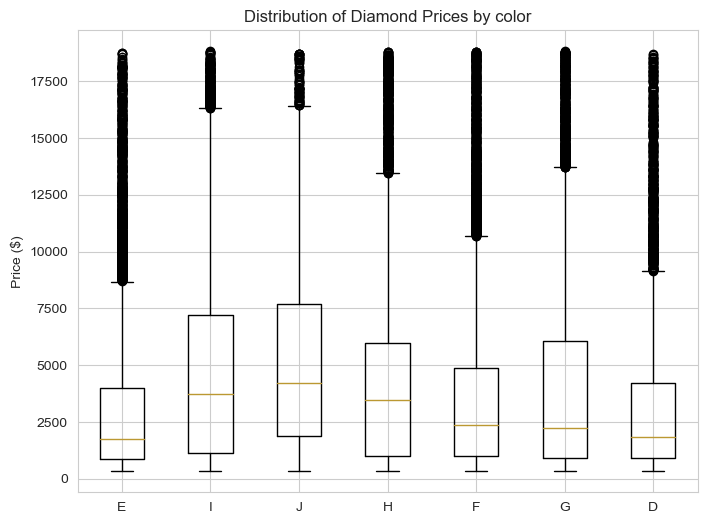

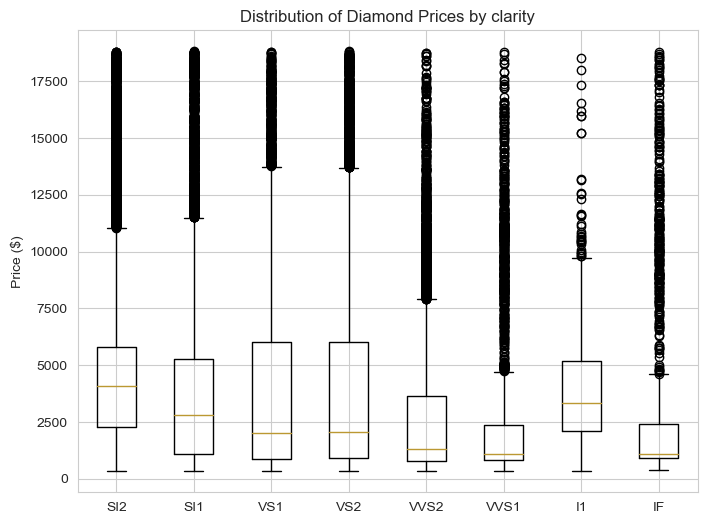

In [111]:
# Matplotlib

# Create a box plot comparing diamond prices across different diamond cuts

for i in Categorical_columns:
    fig, ax = plt.subplots(figsize=(8,6))
    ax.boxplot([diamond[diamond[i] == j]["price"] for j in diamond[i].unique()])
    ax.set_xticklabels(diamond[i].unique())
    ax.set_ylabel('Price ($)')
    ax.set_title(f'Distribution of Diamond Prices by {i}')
    plt.show()

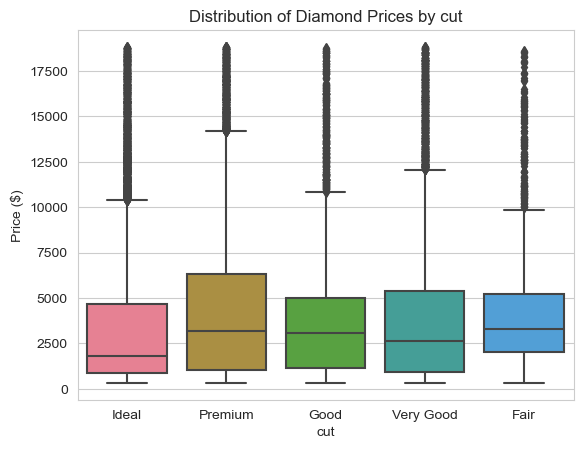

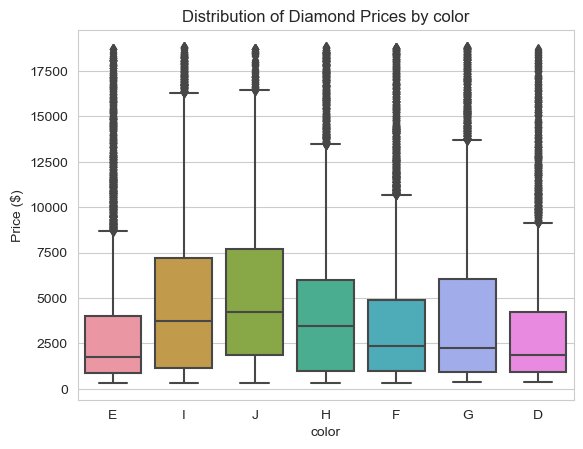

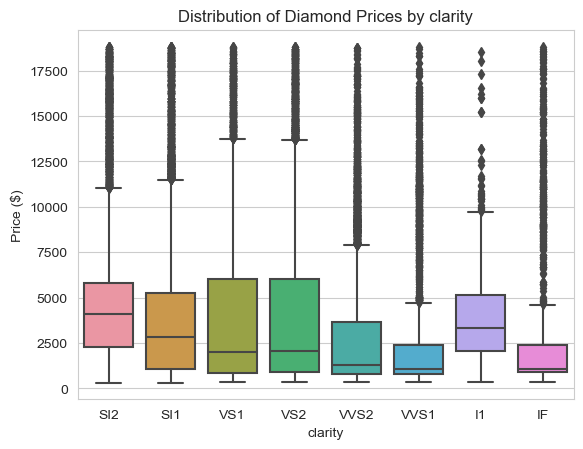

In [112]:
# Seaborn

# Create a box plot comparing diamond prices across different diamond cuts
sns.set_style("whitegrid")
sns.set_palette("husl")

for i in Categorical_columns:
    sns.boxplot(x=diamond[i], y=diamond["price"])
    plt.ylabel('Price ($)')
    plt.title(f'Distribution of Diamond Prices by {i}')
    plt.show()

### Observation:

- The median price for good and premium cut diamonds is higher than the other cuts.
- The price for diamonds with color grade D and E is higher than the other color grades.
- The price for diamonds with clarity grade IF and VVS1 is higher than the other clarity grades.
- There is a large spread in the price for all categories, indicating that there are diamonds in each category that are priced very high or very low.

### Violin plot

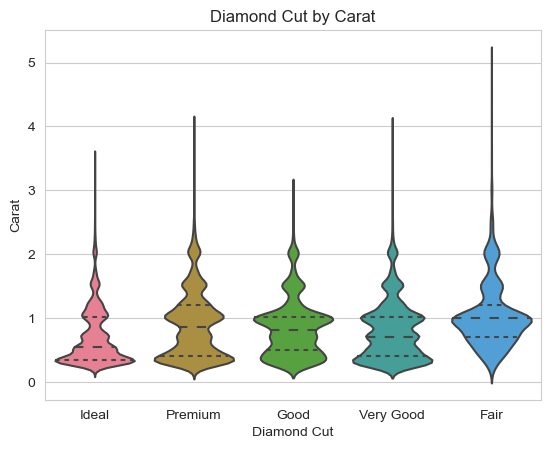

In [113]:
# Seaborn

# Create a violin plot
sns.set_style("whitegrid")
sns.set_palette("husl")

sns.violinplot(x='cut', y='carat', data=diamond, scale='width', inner='quartile')

plt.xlabel('Diamond Cut')
plt.ylabel('Carat')
plt.title('Diamond Cut by Carat')
plt.show()

### Observation:

- From the plot, it can be seen that the distribution of carat for the Fair and Good cuts is wider and skewed towards higher carat values compared to the other cuts. 
- The Ideal cut has the narrowest distribution of carat and is centered around 0.5 carats. 
- Overall, the violin plot provides an easy way to visualize the distribution of a continuous variable (carat) across different categories (cut) in the dataset.

# Step 2.3 Multivariate Analysis

## Facetgrid Plot

### Price Vs Carat for different cuts

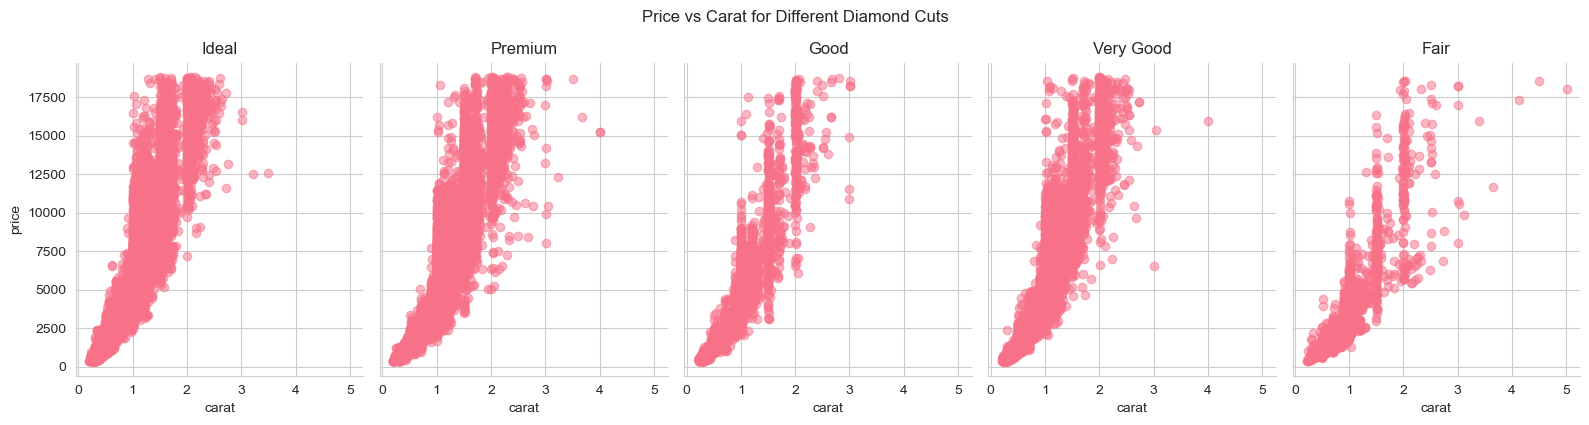

In [114]:
# Seaborn

# Create a FacetGrid with diamond cut on the x-axis and diamond color on the y-axis
g = sns.FacetGrid(diamond, col='cut', height=4, aspect=0.8)

# Map a scatter plot to the FacetGrid using 'carat' and 'price' columns from diamond dataframe, colored by cut
g.map(plt.scatter, 'carat', 'price', alpha=0.5)

# Set titles for each subplot based on the diamond cut
for ax in g.axes.flat:
    title = ax.get_title().split(' = ')[-1]  # extract diamond cut from default title
    ax.set_title(title)

# Add a title to the overall plot
g.fig.suptitle('Price vs Carat for Different Diamond Cuts', y=1.05)

# Show the plot
plt.show()

### Observation:

- The price generally increases with increasing carat size, regardless of the diamond cut. 
- Additionally, it seems that the range of prices increases as the diamond cut decreases in quality.

## Boxplot

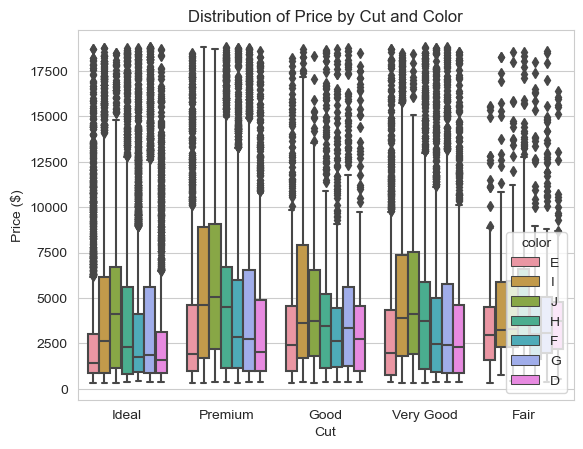

In [115]:
# Create a box plot showing the distribution of 'price' by 'cut' and 'color'
sns.boxplot(x='cut', y='price', hue='color', data=diamond)

# Set the title and axis labels
plt.title('Distribution of Price by Cut and Color')
plt.xlabel('Cut')
plt.ylabel('Price ($)')

# Show the plot
plt.show()

### Observation:

- Within each cut quality, the median price tends to increase with higher color grade (i.e., J color grade has higher median price compared to D color grade).
- The variability of price tends to increase with lower diamond cut quality and lower color grade, indicating a wider range of prices for lower quality diamonds.

## Scatterplot

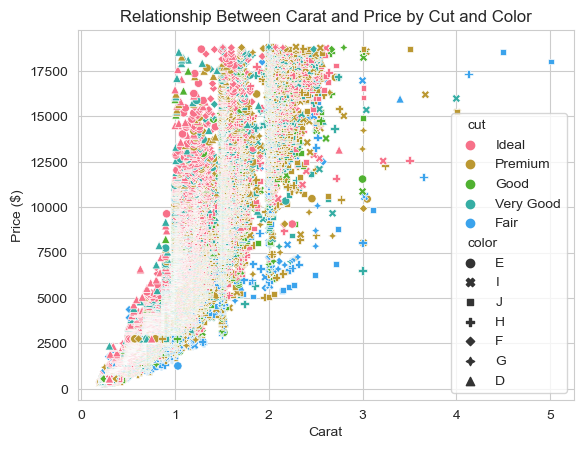

In [116]:
# Create a scatter plot showing the relationship between 'carat' and 'price', with 'cut' and 'color' as the hue
sns.scatterplot(x='carat', y='price', hue='cut', style='color', data=diamond)

# Set the title and axis labels
plt.title('Relationship Between Carat and Price by Cut and Color')
plt.xlabel('Carat')
plt.ylabel('Price ($)')

# Show the plot
plt.show()

### Observation:

- The plot suggests that there is a positive correlation between carat and price, i.e., as the carat weight of the diamond increases, the price also tends to increase. 
- The plot also shows that different cuts have different price ranges for the same carat weight, with Ideal and Premium cuts having the highest price ranges. 
- Similarly, different colors also have different price ranges for the same carat weight, with colorless diamonds being more expensive than colored ones.

## Catplot

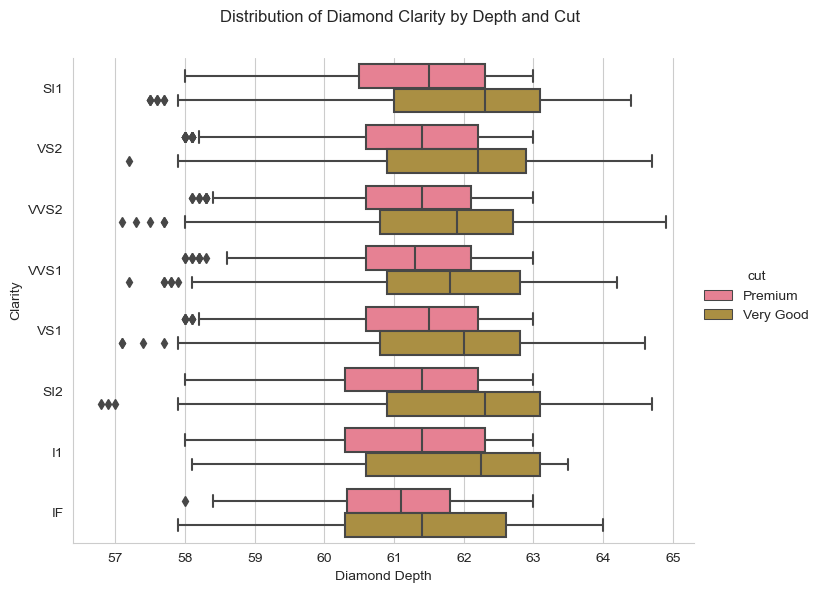

In [117]:
# Create a box plot showing the distribution of 'depth' by 'cut' and 'clarity'
sns.catplot(x='depth', y='clarity', hue='cut', data=diamond[diamond.cut >'Ideal'], kind='box', height=6, aspect=1.2)

# Set the title and axis labels
plt.subplots_adjust(top=0.9)
plt.suptitle('Distribution of Diamond Clarity by Depth and Cut')
plt.xlabel('Diamond Depth')
plt.ylabel('Clarity')

# Show the plot
plt.show()

### Observation:

- From above plot, We can see that the depth varies across different cuts and clarities, with some cuts having a wider range of depth than others. 
- The Very Good cut has the widest range of depths, and that there are some outliers with much higher or lower depths than the majority of diamonds in that category. 

# 3. Inferences

1. What proportion of diamonds have a clarity of Sl1, Sl2, or VS2?

- To determine the proportion of diamonds in the dataset with a clarity of Sl1, Sl2, or VS2, we can count the number of diamonds with each of these clarities using the value_counts() function from pandas. 
- Once we have the counts, we can divide each count by the total number of diamonds in the dataset to obtain the proportions.

In [118]:
# Count the number of diamonds with each clarity level
diamond_clarity_count = diamond['clarity'].value_counts()

# Calculate the total number of diamonds
total_number_of_diamonds = len(diamond)

# Calculate the proportion of diamonds with each clarity level
sl1 = diamond_clarity_count['SI1'] / total_number_of_diamonds
sl2 = diamond_clarity_count['SI2'] / total_number_of_diamonds
vs2 = diamond_clarity_count['VS2'] / total_number_of_diamonds

# Print the results
print('Proportion of diamonds with SI1 clarity:', sl1)
print('Proportion of diamonds with SI2 clarity:', sl2)
print('Proportion of diamonds with VS2 clarity:', vs2)

Proportion of diamonds with SI1 clarity: 0.2422135706340378
Proportion of diamonds with SI2 clarity: 0.17044864664441972
Proportion of diamonds with VS2 clarity: 0.22725250278086764


### Observation:
- The majority of diamonds have a clarity rating of either SI1 or VS2, with SI1 being the most common clarity level. 
- Diamonds with a clarity rating of SI2 are less common than SI1 and VS2.

2. How many of the diamonds have a length that is less than ¾ of the mean diamond length?

- To determine the count of diamonds that have a length less than 3/4 of the mean diamond length, we can perform the following steps:

    - Calculate the mean length of all diamonds in the dataset.
    - Multiply the mean length by 0.75 to get the value of 3/4 of the mean length.
    - Extract only the rows where the length is less than the value calculated in previous step.
    - Count the number of rows to get the total count of diamonds with a length less than 3/4 of the mean diamond length.

In [119]:
# Calculate the mean length of the diamonds
mean_diamond_length = diamond['x'].mean()

# Calculate 3/4 of the mean length
three_quarters_mean_diamond_length = 0.75 * mean_diamond_length

# Filter the dataframe to include only diamonds with a length less than 3/4 of the mean length
diamond__less_than_three_quarter = diamond[diamond['x'] < three_quarters_mean_diamond_length]

# Count the number of rows in the filtered dataframe to find the number of diamonds that meet this criterion
number_of_diamonds = diamond__less_than_three_quarter.shape[0]

# Print the result
print("Number of diamonds with a length less than 3/4 of the mean length:", number_of_diamonds)

Number of diamonds with a length less than 3/4 of the mean length: 2942


### Observation:

- Out of all the diamonds in the dataset, 2942 diamonds have a length that is less than 3/4 of the mean length of all the diamonds. 

3. How many of the diamonds have a carat value that is greater than the median carat value?

- To find the number of diamonds that have a carat value greater than the median carat value, we can use the median() function from pandas to calculate the median carat value of the diamonds
- Extract the diamonds dataframe to include only those diamonds with a carat value greater than the median. 
- We can then count the number of rows in the filtered dataframe to find the number of diamonds that meet this criterion.

In [120]:
# Calculate the median carat value of the diamonds
median_carat_value_diamond = diamond['carat'].median()

# Extract the dataframe to include only diamonds with a carat value greater than the median
carat_greater_than_median = diamond[diamond['carat'] > median_carat_value_diamond]

# Count the number of rows in the filtered dataframe to find the number of diamonds with such criteria
number_of_diamonds = carat_greater_than_median.shape[0]

# Print the result
print("Number of diamonds with a carat value greater than the median:", number_of_diamonds)


Number of diamonds with a carat value greater than the median: 26778


4. How many diamonds have either a ‘Fair’ or a ‘Premium’ cut? Note that the possible values for the quality of a cut are ranked in ascending order as follows: **Fair / Good / Very Good / Premium / Ideal**

In [121]:
# Define the order of the diamond cuts in ascending order
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

# Filter the dataframe to include only 'Fair' and 'Premium' cuts
fair_premium_diamonds = diamond[(diamond['cut'] == 'Fair') | (diamond['cut'] == 'Premium')]

# Count the number of diamonds with either a 'Fair' or 'Premium' cut
num_fair_premium = fair_premium_diamonds.shape[0]

# Print the result
print("Number of diamonds with either a 'Fair' or 'Premium' cut:", num_fair_premium)

Number of diamonds with either a 'Fair' or 'Premium' cut: 15401


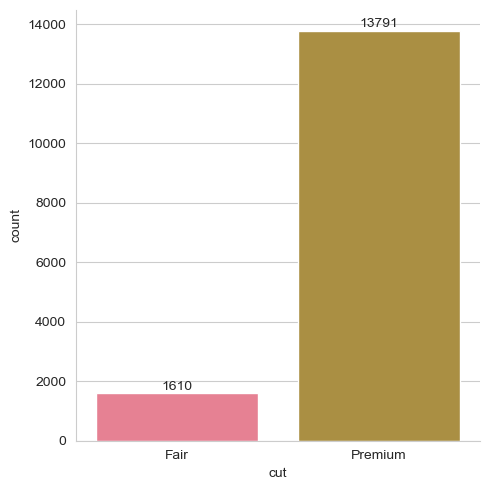

In [122]:
# Define the order of the diamond cuts
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

# Create a count plot showing the distribution of 'cut' values
sns.catplot(x='cut', data=diamond[diamond['cut'].isin(['Fair', 'Premium'])], kind='count', order=['Fair', 'Premium'])

# Set the title and axis labels
ax = plt.gca() # get current axis
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 5), ha='center', va='bottom')

# Show the plot
plt.show()

### Observation:

- We have total 15401 diamonds in 'Premium' and 'Fair' cuts

5. Which diamond has the lowest price per carat? What is its value? Answer by providing the dataframe row index and the price per carat for that specific diamond.

In [123]:
# Calculate price per carat for each diamond
diamond['price_per_carat'] = diamond['price'] / diamond['carat']

# Find the diamond with the lowest price per carat
lowest_price_per_carat = diamond.loc[diamond['price_per_carat'].idxmin()]

# Print the row index and price per carat for that diamond
print("Row index:", lowest_price_per_carat.name)
print("Price per carat:", lowest_price_per_carat['price_per_carat'])

Row index: 31963
Price per carat: 1051.1627906976744


6. Using both Matplolib and Seaborn, make and compare boxplots of carat metric for each distinct clarity value and discuss any conclusions you can draw from your comparison of the appearance of the boxplots.

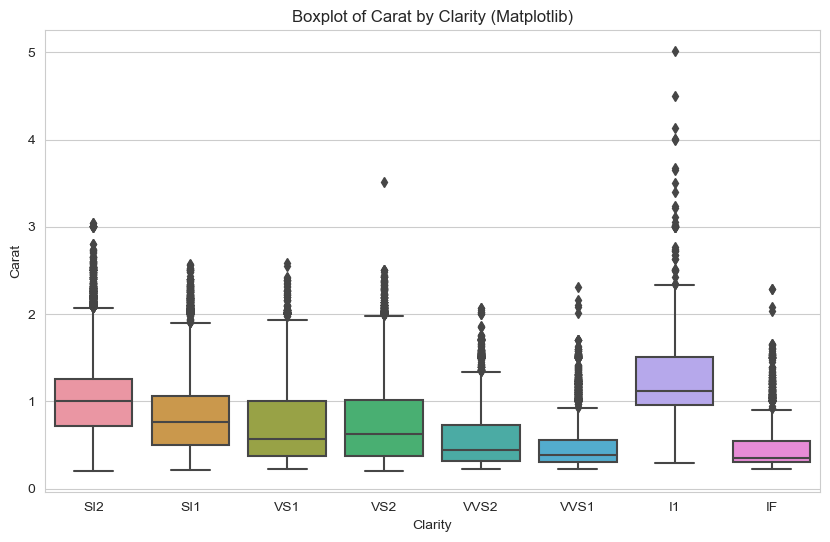

In [124]:
# Create a boxplot using Matplotlib
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='clarity', y='carat', data=diamond, ax=ax)
ax.set_title('Boxplot of Carat by Clarity (Matplotlib)')
ax.set_xlabel('Clarity')
ax.set_ylabel('Carat')
plt.show()

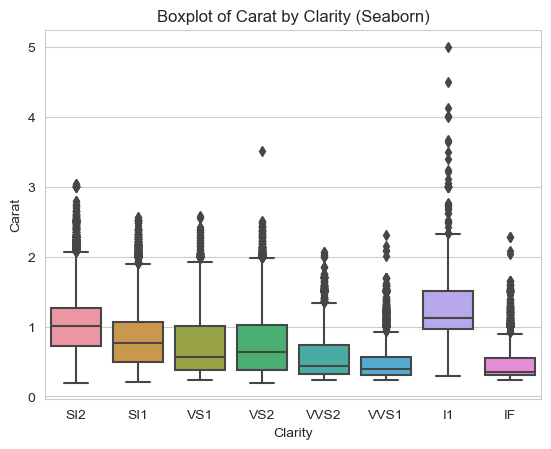

In [125]:
# Create a boxplot using Seaborn
sns.set_style('whitegrid')
sns.boxplot(x='clarity', y='carat', data=diamond)
plt.title('Boxplot of Carat by Clarity (Seaborn)')
plt.xlabel('Clarity')
plt.ylabel('Carat')
plt.show()

### Observation:

- We can see that the diamonds with higher clarity grades (IF, VVS1, and VVS2) tend to have a smaller range of carat values, with most diamonds falling within the range of 0 to 3 carats. In contrast, diamonds with lower clarity grades (VS1, VS2, SI1, and SI2) have a wider range of carat values, with some diamonds having carat values as high as 5 or 6.

- Overall, the boxplots suggest that there is a relationship between diamond clarity and carat size, with higher clarity diamonds tending to be smaller in size, and lower clarity diamonds tending to be larger in size.

7. Using both Matplolib and Seaborn, make a scatter plot of carat vs. depth. What can we say about the relationship between those two attributes?

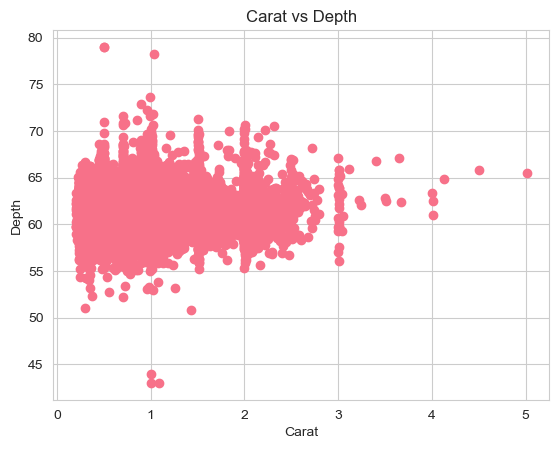

In [126]:
# Create a scatter plot of carat vs. depth using Matplotlib
plt.scatter(diamond['carat'], diamond['depth'])
plt.title('Carat vs Depth')
plt.xlabel('Carat')
plt.ylabel('Depth')
plt.show()

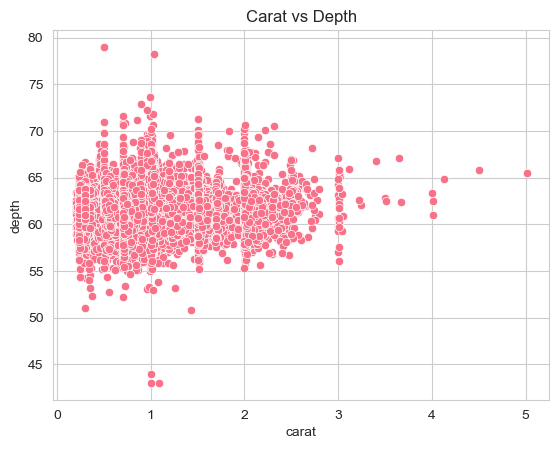

In [127]:
# Create a scatter plot of carat vs. depth using Seaborn
sns.scatterplot(x='carat', y='depth', data=diamond)
plt.title('Carat vs Depth')
plt.show()

### Observation:

- We can see that the correlation is uniformly distributed between these two attributes. This means that as the carat weight of the diamond increases, the depth tends scattered in the middle over average depth. However, the correlation is not very strong, as there are many points that deviate from the general trend. Therefore, we can say that carat and depth are somewhat related, but other factors also play a significant role in determining diamond's depth.

# 4. Conclusion

- Based on above analysis from plots and calculations, below are some conclusions we have drawn:

    1. No missing or null values found in the dataset
    2. Clarity SI1, SI2, and VS2 are the most common clarity grades among the diamonds in the dataset.
    3. The most popular cut for diamonds is Ideal, followed by Premium and Very Good.
    4. There is a wide range of prices for diamonds with the same carat weight and quality characteristics, indicating that other factors beyond carat weight, cut, color, and clarity also play a role in determining a diamond's value.
    5. The dataset contains a wide range of diamond colors, with G and H being the most common.
    6. The dataset contains a wide range of diamond colors, but the most common colors are G and H.
    7. The scatter plot of carat vs. price shows a clear positive correlation between these two variables.
    8. The dataset contains some outliers in terms of price and carat weight, indicating the presence of high-value and unique diamonds.
    9. The box plots of carat by clarity demonstrate that, on average, diamonds with higher clarity grades have lower carat weights.
    10. Carat has a positive correlation with price, meaning that as the carat weight of a diamond increases, so does its price.
   

# 5. References/Citations

**Citation**- https://www.torresjewelco.com.au/diamonds/education/depth-table-percentage.html